In [5]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway', 'latency']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = {}
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data = client_data.query("time >'2018-11-15 12:30:00' and time < '2018-11-19 14:30:00'")
        #print(client_data.head())
        data[client] = client_data.resample('2Min')['gateway','latency']
    return data

data = read_clients("gateways")


In [2]:
len(data)

20

In [6]:
from math import*
from functools import reduce

def square_rooted(x):
    y = [a*a for a in x]
    return sqrt(sum(y))

 
def cosine_similarity(x,y):
    a = []
    b = []
    
    for key in x:
        if key in y:
            a.append(x[key][0])
            b.append(y[key][0])
    if len(b) == 0:
        return -1
    numerator = sum(a1*b1 for a1,b1 in zip(a,b))
    denominator = square_rooted(a)*square_rooted(b)
    return numerator/float(denominator)
    #print(i,len(y),numerator/float(denominator))
    #return round(numerator/float(denominator),3)



elements = list(data.keys()) #20
size = len(data[list(elements)[0]]) #721
j=7


while j<len(elements):
    i=0
    test1 = {}
    keys = {}
    compared = list(data[elements[j]])
    size = len(compared)
    result = pd.DataFrame()
    while i<size:
        avg = 0
        for element in elements:
            if element == elements[j]:
                continue
            test = list(data[element])
            if len(test)<len(compared):
                size  = len(test)
            #while(i<size):
            date = list(data[element])[i][0]
            comp = compared[i][1]
            comp = comp.drop(columns=['time'])
            comp = comp.set_index('gateway')
            test1 = comp.T.to_dict('list')

            temp =  list(data[element])[i][1]
            temp = temp.drop(columns=['time'])
            temp = temp.set_index('gateway')
            test2 = temp.T.to_dict('list')

            avg += cosine_similarity(test1, test2)

        print(date,':',avg/(len(elements)-1))
        result = result.append({'time':date, 'similarity':avg/(len(elements)-1)}, ignore_index=True)
        i+=1

    result = result.set_index('time')
    result.to_csv('result'+str(j)+'.csv')
    j +=1

SyntaxError: invalid syntax (<ipython-input-6-54e37ab1bad4>, line 46)

In [ ]:
from math import*
from functools import reduce

def square_rooted(x):
    y = [a*a for a in x]
    return sqrt(sum(y))

 
def cosine_similarity(x,y):
    a = []
    b = []
    
    for key in x:
        if key in y:
            a.append(x[key][0])
            b.append(y[key][0])
    if len(b) == 0:
        return -1
    numerator = sum(a1*b1 for a1,b1 in zip(a,b))
    denominator = square_rooted(a)*square_rooted(b)
    return numerator/float(denominator)
    #print(i,len(y),numerator/float(denominator))
    #return round(numerator/float(denominator),3)



elements = list(data.keys()) #20
size = len(data[list(elements)[0]]) #721
j=0


while j<len(elements):
    i=0
    test1 = {}
    keys = {}
    compared = list(data[elements[j]])
    size = len(compared)
    result = pd.DataFrame()
    while i<size:
        avg = 0
        for element in elements:
            if element == elements[j]:
                continue
            test = list(data[element])
            if len(test)<len(compared):
                size  = len(test)
            #while(i<size):
            date = list(data[element])[i][0]
            comp = compared[i][1]
            comp = comp.drop(columns=['time'])
            comp = comp.set_index('gateway')
            test1 = comp.T.to_dict('list')

            temp =  list(data[element])[i][1]
            temp = temp.drop(columns=['time'])
            temp = temp.set_index('gateway')
            test2 = temp.T.to_dict('list')

            avg += cosine_similarity(test1, test2)

        print(date,':',avg/(len(elements)-1))
        result = result.append({'time':date, 'similarity':avg/(len(elements)-1)}, ignore_index=True)
        i+=1

    result = result.set_index('time')
    result.to_csv('similarity_new/result'+str(j)+'.csv')
    j +=1

2018-11-15 12:30:00 : 0.7794591701710947
2018-11-15 12:32:00 : 0.9131784784671915
2018-11-15 12:34:00 : 0.9460677849766571
2018-11-15 12:36:00 : 0.9681318264774693
2018-11-15 12:38:00 : 0.9508009964105686
2018-11-15 12:40:00 : 0.9043602838269195
2018-11-15 12:42:00 : 0.9567767112751184
2018-11-15 12:44:00 : 0.9576176822907707
2018-11-15 12:46:00 : 0.9363873369343192
2018-11-15 12:48:00 : 0.9577911069352385
2018-11-15 12:50:00 : 0.9676434658870705
2018-11-15 12:52:00 : 0.8983164818316326
2018-11-15 12:54:00 : 0.6366000896363468
2018-11-15 12:56:00 : 0.9254011972513855
2018-11-15 12:58:00 : 0.8324307670398308
2018-11-15 13:00:00 : 0.8722343381129302
2018-11-15 13:02:00 : 0.7886270245647667
2018-11-15 13:04:00 : 0.9441295055741917
2018-11-15 13:06:00 : 0.9507429981448553
2018-11-15 13:08:00 : 0.7787183547634033
2018-11-15 13:10:00 : 0.9531894993125929
2018-11-15 13:12:00 : 0.9554705913055833
2018-11-15 13:14:00 : 0.9367096094090288
2018-11-15 13:16:00 : 0.9354601360894531
2018-11-15 13:18

C:\Users\Khulan\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:57: UserWarning: DataFrame columns are not unique, some columns will be omitted.


2018-11-15 14:48:00 : 0.9625042971601466
2018-11-15 14:50:00 : 0.9625701237354951
2018-11-15 14:52:00 : 0.9665711523285626
2018-11-15 14:54:00 : 0.9321414629076359
2018-11-15 14:56:00 : 0.9542486832867283
2018-11-15 14:58:00 : 0.9595096964125526
2018-11-15 15:00:00 : 0.6262835736233793
2018-11-15 15:02:00 : 0.9468986571731919
2018-11-15 15:04:00 : 0.9601038583081922
2018-11-15 15:06:00 : 0.9371844832550322
2018-11-15 15:08:00 : 0.9103291406938068
2018-11-15 15:10:00 : 0.9366068546699745
2018-11-15 15:12:00 : 0.9327540982727035
2018-11-15 15:14:00 : 0.9587704435010085
2018-11-15 15:16:00 : 0.9662633670552082
2018-11-15 15:18:00 : 0.8533111510086295
2018-11-15 15:20:00 : 0.9702746997496294
2018-11-15 15:22:00 : 0.9167881917160293
2018-11-15 15:24:00 : 0.9604001771942674
2018-11-15 15:26:00 : 0.8721219603703267
2018-11-15 15:28:00 : 0.8396621413931648
2018-11-15 15:30:00 : 0.8955550668091481
2018-11-15 15:32:00 : 0.9999981825266115
2018-11-15 15:34:00 : 0.9999969553499554
2018-11-15 15:36

2018-11-15 21:30:00 : 0.8020690969433732
2018-11-15 21:32:00 : 0.9112708041517487
2018-11-15 21:34:00 : 0.9032616640784289
2018-11-15 21:36:00 : 0.8896051405519741
2018-11-15 21:38:00 : 0.9837139521045511
2018-11-15 21:40:00 : 0.9533175912620085
2018-11-15 21:42:00 : 0.9730554651485346
2018-11-15 21:44:00 : 0.5736268792532189
2018-11-15 21:46:00 : 0.922596505783613
2018-11-15 21:48:00 : 0.6253810912792996
2018-11-15 21:50:00 : 0.9567748858190374
2018-11-15 21:52:00 : 0.6822509804892496
2018-11-15 21:54:00 : 0.9479631037567453
2018-11-15 21:56:00 : 0.6168472462809497
2018-11-15 21:58:00 : 0.8456577253725173
2018-11-15 22:00:00 : 0.6239967714513149
2018-11-15 22:02:00 : 0.9156462378341538
2018-11-15 22:04:00 : 0.8777871564220309
2018-11-15 22:06:00 : 0.9396055038937352
2018-11-15 22:08:00 : 0.8513945497500224
2018-11-15 22:10:00 : 0.9204801998730465
2018-11-15 22:12:00 : 0.9253628798767387
2018-11-15 22:14:00 : 0.7565169757190207
2018-11-15 22:16:00 : 0.9590796917162022
2018-11-15 22:18:

C:\Users\Khulan\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:52: UserWarning: DataFrame columns are not unique, some columns will be omitted.


2018-11-15 23:12:00 : 0.5153140189561097
2018-11-15 23:14:00 : 0.9558893991661876
2018-11-15 23:16:00 : 0.9647976504716945
2018-11-15 23:18:00 : 0.7507764597480975
2018-11-15 23:20:00 : 0.5148684118787817
2018-11-15 23:22:00 : 0.9386204411213993
2018-11-15 23:24:00 : 0.8489258009621077
2018-11-15 23:26:00 : 1.0
2018-11-15 23:28:00 : 0.4302173819673758
2018-11-15 23:30:00 : 0.8612061238857948
2018-11-15 23:32:00 : 0.9737647316387621
2018-11-15 23:34:00 : 0.9296827387720102
2018-11-15 23:36:00 : 0.9071128165595466
2018-11-15 23:38:00 : 0.9435513069380608
2018-11-15 23:40:00 : 0.9601633204930335
2018-11-15 23:42:00 : 0.9392886508582179
2018-11-15 23:44:00 : 0.9672147902118381
2018-11-15 23:46:00 : 0.9557555175230054
2018-11-15 23:48:00 : 0.8050820422025441
2018-11-15 23:50:00 : 0.9573943184035043
2018-11-15 23:52:00 : 0.9375318110697272
2018-11-15 23:54:00 : 0.744404031417984
2018-11-15 23:56:00 : 0.9743037122980394
2018-11-15 23:58:00 : 0.7121253915370181
2018-11-16 00:00:00 : 0.86439721

2018-11-16 05:54:00 : 0.9565362067278843
2018-11-16 05:56:00 : 0.9564751918625406
2018-11-16 05:58:00 : 0.9136144172341552
2018-11-16 06:00:00 : 0.7753931788644223
2018-11-16 06:02:00 : 0.9363113133366014
2018-11-16 06:04:00 : 0.9631505556352251
2018-11-16 06:06:00 : 0.9656507370678483
2018-11-16 06:08:00 : 0.9471139729660493
2018-11-16 06:10:00 : 0.9699612735487698
2018-11-16 06:12:00 : 0.9689512508910609
2018-11-16 06:14:00 : 0.6452616411206676
2018-11-16 06:16:00 : 0.9516988958961246
2018-11-16 06:18:00 : 0.9503952405169808
2018-11-16 06:20:00 : 0.9548228940024038
2018-11-16 06:22:00 : 0.9356856402688855
2018-11-16 06:24:00 : 0.9639108268241704
2018-11-16 06:26:00 : 0.980009312551884
2018-11-16 06:28:00 : 0.9538323473412397
2018-11-16 06:30:00 : 0.813831292684045
2018-11-16 06:32:00 : 0.9505345602868926
2018-11-16 06:34:00 : 0.9417177125075755
2018-11-16 06:36:00 : 0.9775880733753824
2018-11-16 06:38:00 : 0.9689284519728216
2018-11-16 06:40:00 : 0.9632469930904691
2018-11-16 06:42:0

2018-11-16 12:36:00 : 0.9692241613163299
2018-11-16 12:38:00 : 0.6821995497768942
2018-11-16 12:40:00 : 0.9738419257476177
2018-11-16 12:42:00 : 0.9737505140919003
2018-11-16 12:44:00 : 0.9449303433223056
2018-11-16 12:46:00 : 0.9710871395337799
2018-11-16 12:48:00 : 0.6641785711489565
2018-11-16 12:50:00 : 0.8904196429770628
2018-11-16 12:52:00 : 0.9795311796513785
2018-11-16 12:54:00 : 0.9721840826335765
2018-11-16 12:56:00 : 0.9654794978204456
2018-11-16 12:58:00 : 0.9391810805913134
2018-11-16 13:00:00 : 0.8636600194387363
2018-11-16 13:02:00 : 0.9825203698278312
2018-11-16 13:04:00 : 0.9269652102492957
2018-11-16 13:06:00 : 0.9320198333742149
2018-11-16 13:08:00 : 0.9051406057284003
2018-11-16 13:10:00 : 0.9260162448951152
2018-11-16 13:12:00 : 0.947186831958816
2018-11-16 13:14:00 : 0.942132231947312
2018-11-16 13:16:00 : 0.92972308805886
2018-11-16 13:18:00 : 0.9342393999079549
2018-11-16 13:20:00 : 0.942083383933162
2018-11-16 13:22:00 : 0.9631750717475438
2018-11-16 13:24:00 :

2018-11-16 19:18:00 : 0.9588880430135696
2018-11-16 19:20:00 : 0.8367853681947303
2018-11-16 19:22:00 : 0.9425248916556638
2018-11-16 19:24:00 : 0.8916362066572671
2018-11-16 19:26:00 : 0.9417587835570139
2018-11-16 19:28:00 : 0.946733864602991
2018-11-16 19:30:00 : 0.6386082517980786
2018-11-16 19:32:00 : 0.45459069812200054
2018-11-16 19:34:00 : 0.9724635505126197
2018-11-16 19:36:00 : 0.9264759754810798
2018-11-16 19:38:00 : 0.42592311499171825
2018-11-16 19:40:00 : 0.9510451837496131
2018-11-16 19:42:00 : 0.9409757107996065
2018-11-16 19:44:00 : 0.9684367142077711
2018-11-16 19:46:00 : 0.7728907329417267
2018-11-16 19:48:00 : 0.9238126981419
2018-11-16 19:50:00 : 0.8817366681335895
2018-11-16 19:52:00 : 0.46593295863617845
2018-11-16 19:54:00 : 0.8914436889242301
2018-11-16 19:56:00 : 0.8899464770044402
2018-11-16 19:58:00 : 0.6931794027118281
2018-11-16 20:00:00 : 0.22967482656227042
2018-11-16 20:02:00 : 0.9463563761900146
2018-11-16 20:04:00 : 0.9748633203742152
2018-11-16 20:06

2018-11-17 02:00:00 : 0.8759483268047341
2018-11-17 02:02:00 : 0.955520262626543
2018-11-17 02:04:00 : 0.9612964753382126
2018-11-17 02:06:00 : 0.9741792026615265
2018-11-17 02:08:00 : 0.9794108861717963
2018-11-17 02:10:00 : 0.9415753392279751
2018-11-17 02:12:00 : 0.9453548849397442
2018-11-17 02:14:00 : 0.7622818300938764
2018-11-17 02:16:00 : 0.9669710878128075
2018-11-17 02:18:00 : 0.9817413695937937
2018-11-17 02:20:00 : 0.8555021015888675
2018-11-17 02:22:00 : 0.9745787677126044
2018-11-17 02:24:00 : 0.8419001471862633
2018-11-17 02:26:00 : 0.9650364650277635
2018-11-17 02:28:00 : 0.9615326284148075
2018-11-17 02:30:00 : 0.8297079927699302
2018-11-17 02:32:00 : 0.970941623341266
2018-11-17 02:34:00 : 0.6793743804881054
2018-11-17 02:36:00 : 0.9484755778623913
2018-11-17 02:38:00 : 0.9384788140700722
2018-11-17 02:40:00 : 0.9530784725181881
2018-11-17 02:42:00 : 0.9793392617006703
2018-11-17 02:44:00 : 0.9569914227416739
2018-11-17 02:46:00 : 0.9630268817180166
2018-11-17 02:48:0

2018-11-17 08:42:00 : 0.989117109401246
2018-11-17 08:44:00 : 0.7558230695386285
2018-11-17 08:46:00 : 0.992665898897223
2018-11-17 08:48:00 : 0.9916308087265803
2018-11-17 08:50:00 : 0.9716871020131826
2018-11-17 08:52:00 : 0.994997681288052
2018-11-17 08:54:00 : 0.9835041361789729
2018-11-17 08:56:00 : 0.9694205431949908
2018-11-17 08:58:00 : 0.9800527103679627
2018-11-17 09:00:00 : 0.3838559987153858
2018-11-17 09:02:00 : 0.9865778258214408
2018-11-17 09:04:00 : 0.9701206637943709
2018-11-17 09:06:00 : 0.9924423230645611
2018-11-17 09:08:00 : 0.9889224582364441
2018-11-17 09:10:00 : 0.9017599644206907
2018-11-17 09:12:00 : 0.9729551070091893
2018-11-17 09:14:00 : 0.9160341755465069
2018-11-17 09:16:00 : 0.9814803332558146
2018-11-17 09:18:00 : 0.4523775396920585
2018-11-17 09:20:00 : 0.8857306846593523
2018-11-17 09:22:00 : 0.8961942261682612
2018-11-17 09:24:00 : 0.8213003691242765
2018-11-17 09:26:00 : 0.8562050354181248
2018-11-17 09:28:00 : 0.5598771622455025
2018-11-17 09:30:00

2018-11-17 15:24:00 : 0.986493205062066
2018-11-17 15:26:00 : 0.9614875795802299
2018-11-17 15:28:00 : 0.7501251074882255
2018-11-17 15:30:00 : 0.9429285928008799
2018-11-17 15:32:00 : 0.9900317256692904
2018-11-17 15:34:00 : 0.9375672114048386
2018-11-17 15:36:00 : 0.9866850940976972
2018-11-17 15:38:00 : 0.8147707751310812
2018-11-17 15:40:00 : 0.9882999820078388
2018-11-17 15:42:00 : 0.9313519671575419
2018-11-17 15:44:00 : 0.9682492318534598
2018-11-17 15:46:00 : 0.9755306156144662
2018-11-17 15:48:00 : 0.9704874292428923
2018-11-17 15:50:00 : 0.9581428862595572
2018-11-17 15:52:00 : 0.9844050864191235
2018-11-17 15:54:00 : 0.992081294156688
2018-11-17 15:56:00 : 0.9819324576032485
2018-11-17 15:58:00 : 0.8545043283695392
2018-11-17 16:00:00 : 0.9081769664774957
2018-11-17 16:02:00 : 0.9578823110520591
2018-11-17 16:04:00 : 0.9725202164381067
2018-11-17 16:06:00 : 0.9896071294935794
2018-11-17 16:08:00 : 0.9343915692156035
2018-11-17 16:10:00 : 0.9745698580819431
2018-11-17 16:12:0

2018-11-17 22:06:00 : 0.5242675364424393
2018-11-17 22:08:00 : 0.3584771478498453
2018-11-17 22:10:00 : 0.8641120259760378
2018-11-17 22:12:00 : 0.9607770687761399
2018-11-17 22:14:00 : 0.9492973332033996
2018-11-17 22:16:00 : 0.9628996690152937
2018-11-17 22:18:00 : 0.5979190365643428
2018-11-17 22:20:00 : 0.9677491729769602
2018-11-17 22:22:00 : 0.9640834628627426
2018-11-17 22:24:00 : 0.8670728883313203
2018-11-17 22:26:00 : 0.5570190844419367
2018-11-17 22:28:00 : 0.6668335670475721
2018-11-17 22:30:00 : 0.8221778102553561
2018-11-17 22:32:00 : 0.9112916725313611
2018-11-17 22:34:00 : 0.9670131255479646
2018-11-17 22:36:00 : 0.9837213018903036
2018-11-17 22:38:00 : 0.8282773925414197
2018-11-17 22:40:00 : 0.9210099277028394
2018-11-17 22:42:00 : 0.9796502957202302
2018-11-17 22:44:00 : 0.9790168831544784
2018-11-17 22:46:00 : 0.9701442754208519
2018-11-17 22:48:00 : 0.6877225997238671
2018-11-17 22:50:00 : 0.9736862609923791
2018-11-17 22:52:00 : 0.9696837780068537
2018-11-17 22:54

2018-11-18 04:48:00 : 0.46127492589731606
2018-11-18 04:50:00 : 0.9912792569455839
2018-11-18 04:52:00 : 0.986059125796648
2018-11-18 04:54:00 : 0.9855976278284755
2018-11-18 04:56:00 : 0.9784556527722186
2018-11-18 04:58:00 : 0.895185390951609
2018-11-18 05:00:00 : 0.7836753299611458
2018-11-18 05:02:00 : 0.850457540394843
2018-11-18 05:04:00 : 0.9910692022592469
2018-11-18 05:06:00 : 0.9933981045983118
2018-11-18 05:08:00 : 0.9673578039001195
2018-11-18 05:10:00 : 0.7803757908474628
2018-11-18 05:12:00 : 0.9878679715692054
2018-11-18 05:14:00 : 0.9878236621231362
2018-11-18 05:16:00 : 0.98951167313713
2018-11-18 05:18:00 : 0.9896194115606094
2018-11-18 05:20:00 : 0.9925506936012847
2018-11-18 05:22:00 : 0.9903054725737601
2018-11-18 05:24:00 : 0.9516449127358367
2018-11-18 05:26:00 : 0.9916185815732996
2018-11-18 05:28:00 : 0.9887258820044801
2018-11-18 05:30:00 : 0.7279308643537814
2018-11-18 05:32:00 : 0.9926135682269563
2018-11-18 05:34:00 : 0.9564349612740407
2018-11-18 05:36:00 

2018-11-18 11:30:00 : 0.743590275760635
2018-11-18 11:32:00 : 0.9675565123171411
2018-11-18 11:34:00 : 0.981916262414333
2018-11-18 11:36:00 : 0.98113895764869
2018-11-18 11:38:00 : 0.8884951207772794
2018-11-18 11:40:00 : 0.9288778641996137
2018-11-18 11:42:00 : 0.9276777084923835
2018-11-18 11:44:00 : 0.9195580416695794
2018-11-18 11:46:00 : 0.9260563904872715
2018-11-18 11:48:00 : 0.7095076319597877
2018-11-18 11:50:00 : 0.9660547325624366
2018-11-18 11:52:00 : 0.973352793090125
2018-11-18 11:54:00 : 0.9802806299617002
2018-11-18 11:56:00 : 0.9931304302651538
2018-11-18 11:58:00 : 0.9361025662970557
2018-11-18 12:00:00 : 0.8482096219017393
2018-11-18 12:02:00 : 0.9105903061458269
2018-11-18 12:04:00 : 0.9895903364507729
2018-11-18 12:06:00 : 0.9929880775219291
2018-11-18 12:08:00 : 0.9839683487688148
2018-11-18 12:10:00 : 0.9854927558005625
2018-11-18 12:12:00 : 0.98308597114029
2018-11-18 12:14:00 : 0.8915948869627149
2018-11-18 12:16:00 : 0.9813023039723422
2018-11-18 12:18:00 : 0

2018-11-18 18:12:00 : 0.9702849188895188
2018-11-18 18:14:00 : 0.7407734548349284
2018-11-18 18:16:00 : 0.9235988616246589
2018-11-18 18:18:00 : 0.739599844160795
2018-11-18 18:20:00 : 0.9797310998685177
2018-11-18 18:22:00 : 0.8756144665003337
2018-11-18 18:24:00 : 0.9488884503256513
2018-11-18 18:26:00 : 0.970901625852861
2018-11-18 18:28:00 : 0.9381734942872161
2018-11-18 18:30:00 : 0.7437704429358186
2018-11-18 18:32:00 : 0.9147119288317397
2018-11-18 18:34:00 : 0.9583168404442243
2018-11-18 18:36:00 : 0.9771935712490742
2018-11-18 18:38:00 : 0.9621805091101495
2018-11-18 18:40:00 : 0.9430314324517027
2018-11-18 18:42:00 : 0.9623145371126377
2018-11-18 18:44:00 : 0.9655002793608354
2018-11-18 18:46:00 : 0.9448026431952099
2018-11-18 18:48:00 : 0.6730943541231983
2018-11-18 18:50:00 : 0.9880144966597866
2018-11-18 18:52:00 : 0.9360459274238777
2018-11-18 18:54:00 : 0.9055516064911737
2018-11-18 18:56:00 : 0.9573249734326911
2018-11-18 18:58:00 : 0.8809638232807281
2018-11-18 19:00:0

2018-11-19 00:54:00 : 0.9704449113622698
2018-11-19 00:56:00 : 0.9944777240005451
2018-11-19 00:58:00 : 0.9915781323571504
2018-11-19 01:00:00 : 0.6218031963871332
2018-11-19 01:02:00 : 0.9828612044850301
2018-11-19 01:04:00 : 0.961346896347075
2018-11-19 01:06:00 : 0.9711817562190951
2018-11-19 01:08:00 : 0.9754368870437627
2018-11-19 01:10:00 : 0.9908291378656182
2018-11-19 01:12:00 : 0.9952816197371256
2018-11-19 01:14:00 : 0.992918753834925
2018-11-19 01:16:00 : 0.9853804175526445
2018-11-19 01:18:00 : 0.9862644763823362
2018-11-19 01:20:00 : 0.9904059907546736
2018-11-19 01:22:00 : 0.995614075533496
2018-11-19 01:24:00 : 0.9916302256133224
2018-11-19 01:26:00 : 0.9857356516542147
2018-11-19 01:28:00 : 0.9940699746287879
2018-11-19 01:30:00 : 0.994110947816024
2018-11-19 01:32:00 : 0.9913958812371232
2018-11-19 01:34:00 : 0.9705309615867597
2018-11-19 01:36:00 : 0.9924502640791006
2018-11-19 01:38:00 : 0.9612779722179182
2018-11-19 01:40:00 : 0.9889438298181439
2018-11-19 01:42:00 

2018-11-19 07:36:00 : 0.9893456847612548
2018-11-19 07:38:00 : 0.9126245482240996
2018-11-19 07:40:00 : 0.9874265640952056
2018-11-19 07:42:00 : 0.9807563274132651
2018-11-19 07:44:00 : 0.9820231611706999
2018-11-19 07:46:00 : 0.9858417608552829
2018-11-19 07:48:00 : 0.6534985003253946
2018-11-19 07:50:00 : 0.9867478248694986
2018-11-19 07:52:00 : 0.9940617750812263
2018-11-19 07:54:00 : 0.9925442040909378
2018-11-19 07:56:00 : 0.9946532846984538
2018-11-19 07:58:00 : 0.9767663418545204
2018-11-19 08:00:00 : 0.6284748743630852
2018-11-19 08:02:00 : 0.9671278751065691
2018-11-19 08:04:00 : 0.9764277735275153
2018-11-19 08:06:00 : 0.9834798771366088
2018-11-19 08:08:00 : 0.9483199773508502
2018-11-19 08:10:00 : 0.9853204087772816
2018-11-19 08:12:00 : 0.9920959537986306
2018-11-19 08:14:00 : 0.839272767899771
2018-11-19 08:16:00 : 0.9334812133769903
2018-11-19 08:18:00 : 0.990973326811665
2018-11-19 08:20:00 : 0.9870398809695902
2018-11-19 08:22:00 : 0.9868561914697311
2018-11-19 08:24:0

2018-11-19 14:18:00 : 0.896146424881186
2018-11-19 14:20:00 : 0.9500259274353899
2018-11-19 14:22:00 : 0.9263405040229342
2018-11-19 14:24:00 : 0.9856758079781947
2018-11-19 14:26:00 : 0.9818567162791716
2018-11-19 14:28:00 : 0.9245929832894614
2018-11-15 12:30:00 : 0.8616636652420747
2018-11-15 12:32:00 : 0.9361550902145186
2018-11-15 12:34:00 : 0.9101861755010188
2018-11-15 12:36:00 : 0.9702397922253679
2018-11-15 12:38:00 : 0.9352926456610792
2018-11-15 12:40:00 : 0.7800366579069508
2018-11-15 12:42:00 : 0.9387253271124283
2018-11-15 12:44:00 : 0.9678399671691684
2018-11-15 12:46:00 : 0.9507458733408756
2018-11-15 12:48:00 : 0.9421199353865554
2018-11-15 12:50:00 : 0.953941911961612
2018-11-15 12:52:00 : 0.9262912977604411
2018-11-15 12:54:00 : 0.9465349288196985
2018-11-15 12:56:00 : 0.94736744856611
2018-11-15 12:58:00 : 0.9654486945536516
2018-11-15 13:00:00 : 0.8266683344465059
2018-11-15 13:02:00 : 0.9119592036541326
2018-11-15 13:04:00 : 0.9681204975152283
2018-11-15 13:06:00 

2018-11-15 19:00:00 : 0.7025348769613781
2018-11-15 19:02:00 : 0.9591626337578972
2018-11-15 19:04:00 : 0.8501052011217788
2018-11-15 19:06:00 : 0.8457254955921926
2018-11-15 19:08:00 : 0.937808018505083
2018-11-15 19:10:00 : 0.9419026931217791
2018-11-15 19:12:00 : 0.9569470304613561
2018-11-15 19:14:00 : 0.9629371186366115
2018-11-15 19:16:00 : 0.9392872548144297
2018-11-15 19:18:00 : 0.47656617816721997
2018-11-15 19:20:00 : 0.8938869180335912
2018-11-15 19:22:00 : 0.9160173120821892
2018-11-15 19:24:00 : 0.9434632727305847
2018-11-15 19:26:00 : 0.9556591512337429
2018-11-15 19:28:00 : 0.8984503070540673
2018-11-15 19:30:00 : 0.6327912127187778
2018-11-15 19:32:00 : 0.9031511168780808
2018-11-15 19:34:00 : 0.929909368195164
2018-11-15 19:36:00 : 0.9504100549515635
2018-11-15 19:38:00 : 0.8698508328017848
2018-11-15 19:40:00 : 0.9366582745879938
2018-11-15 19:42:00 : 0.9485088752560562
2018-11-15 19:44:00 : 0.9213634399276351
2018-11-15 19:46:00 : 0.9306277574727438
2018-11-15 19:48:

2018-11-16 01:42:00 : 0.9295494079151819
2018-11-16 01:44:00 : 0.9421624259219731
2018-11-16 01:46:00 : 0.9456573331853183
2018-11-16 01:48:00 : 0.9578803425842077
2018-11-16 01:50:00 : 0.9616970411956577
2018-11-16 01:52:00 : 0.904462655146002
2018-11-16 01:54:00 : 0.9405490952952039
2018-11-16 01:56:00 : 0.9695658358276933
2018-11-16 01:58:00 : 0.9754869552330533
2018-11-16 02:00:00 : 0.856141456053157
2018-11-16 02:02:00 : 0.8730133900038586
2018-11-16 02:04:00 : 0.9550156834953412
2018-11-16 02:06:00 : 0.9419239036836018
2018-11-16 02:08:00 : 0.9297159703464913
2018-11-16 02:10:00 : 0.9141411531215007
2018-11-16 02:12:00 : 0.9411236450215149
2018-11-16 02:14:00 : 0.954495001367293
2018-11-16 02:16:00 : 0.9223967797463709
2018-11-16 02:18:00 : 0.9357442236188934
2018-11-16 02:20:00 : 0.8647631702739327
2018-11-16 02:22:00 : 0.9456232336376589
2018-11-16 02:24:00 : 0.8943169131399644
2018-11-16 02:26:00 : 0.9627827002269117
2018-11-16 02:28:00 : 0.9137887836703025
2018-11-16 02:30:00

2018-11-16 08:24:00 : 0.9218510689661286
2018-11-16 08:26:00 : 0.9529555852110628
2018-11-16 08:28:00 : 0.9416084869357068
2018-11-16 08:30:00 : 0.8019368363152009
2018-11-16 08:32:00 : 0.9681313693432718
2018-11-16 08:34:00 : 0.9663751212270717
2018-11-16 08:36:00 : 0.8985711476877412
2018-11-16 08:38:00 : 0.8859480196418391
2018-11-16 08:40:00 : 0.9701766261799155
2018-11-16 08:42:00 : 0.9267561321517457
2018-11-16 08:44:00 : 0.9434955145839223
2018-11-16 08:46:00 : 0.9485282342243643
2018-11-16 08:48:00 : 0.9142383933652916
2018-11-16 08:50:00 : 0.9647233405151214
2018-11-16 08:52:00 : 0.9669130193324503
2018-11-16 08:54:00 : 0.9615799457402258
2018-11-16 08:56:00 : 0.9340897629658673
2018-11-16 08:58:00 : 0.9481794591035774
2018-11-16 09:00:00 : 0.8401802913412402
2018-11-16 09:02:00 : 0.9190391312035533
2018-11-16 09:04:00 : 0.9199489563882935
2018-11-16 09:06:00 : 0.9642113585353231
2018-11-16 09:08:00 : 0.9693468297669724
2018-11-16 09:10:00 : 0.9652091066497568
2018-11-16 09:12

2018-11-16 15:06:00 : 0.9449544888735723
2018-11-16 15:08:00 : 0.9158642613808883
2018-11-16 15:10:00 : 0.8513159911166981
2018-11-16 15:12:00 : 0.9347524043033192
2018-11-16 15:14:00 : 0.965092124335028
2018-11-16 15:16:00 : 0.9804479776480445
2018-11-16 15:18:00 : 0.9296695359932087
2018-11-16 15:20:00 : 0.9578047699087988
2018-11-16 15:22:00 : 0.9498158121349043
2018-11-16 15:24:00 : 0.9064126353531916
2018-11-16 15:26:00 : 0.9515619659684753
2018-11-16 15:28:00 : 0.8883321767148615
2018-11-16 15:30:00 : 0.9061774816655269
2018-11-16 15:32:00 : 0.97320902079269
2018-11-16 15:34:00 : 0.9295665676678313
2018-11-16 15:36:00 : 0.9128422654919153
2018-11-16 15:38:00 : 0.9721995661628133
2018-11-16 15:40:00 : 0.9226137650544135
2018-11-16 15:42:00 : 0.948298225885843
2018-11-16 15:44:00 : 0.9564421951848594
2018-11-16 15:46:00 : 0.8485970657724692
2018-11-16 15:48:00 : 0.9226589289222165
2018-11-16 15:50:00 : 0.919212971363532
2018-11-16 15:52:00 : 0.8708623343645945
2018-11-16 15:54:00 :

2018-11-16 21:48:00 : 0.7091986340560203
2018-11-16 21:50:00 : 0.9316305728100364
2018-11-16 21:52:00 : 0.8631101874819505
2018-11-16 21:54:00 : 0.9259245026583242
2018-11-16 21:56:00 : 0.9463042697514963
2018-11-16 21:58:00 : 0.9011134380211044
2018-11-16 22:00:00 : 0.8228627444888579
2018-11-16 22:02:00 : 0.6854278573879741
2018-11-16 22:04:00 : 0.9574971651473563
2018-11-16 22:06:00 : 0.9235134373230977
2018-11-16 22:08:00 : 0.8631537342818876
2018-11-16 22:10:00 : 0.9417011254078772
2018-11-16 22:12:00 : 0.8908716709539015
2018-11-16 22:14:00 : 0.8790302764618928
2018-11-16 22:16:00 : 0.9618107441245124
2018-11-16 22:18:00 : 0.9531337705728928
2018-11-16 22:20:00 : 0.9429213268136047
2018-11-16 22:22:00 : 0.9560072789224435
2018-11-16 22:24:00 : 0.9620923768157309
2018-11-16 22:26:00 : 0.9305808036853565
2018-11-16 22:28:00 : 0.9486688789403454
2018-11-16 22:30:00 : 0.9060919600403213
2018-11-16 22:32:00 : 0.951715927243171
2018-11-16 22:34:00 : 0.8854423063021585
2018-11-16 22:36:

2018-11-17 04:30:00 : 0.904141257696545
2018-11-17 04:32:00 : 0.9646637780245054
2018-11-17 04:34:00 : 0.9640428805359199
2018-11-17 04:36:00 : 0.9711910776855186
2018-11-17 04:38:00 : 0.9659797271621308
2018-11-17 04:40:00 : 0.9643141545888999
2018-11-17 04:42:00 : 0.9627812431055941
2018-11-17 04:44:00 : 0.961095486166246
2018-11-17 04:46:00 : 0.9283814990355893
2018-11-17 04:48:00 : 0.9749376308127986
2018-11-17 04:50:00 : 0.9682883084062912
2018-11-17 04:52:00 : 0.9694666227316897
2018-11-17 04:54:00 : 0.9693154519512828
2018-11-17 04:56:00 : 0.975022667584286
2018-11-17 04:58:00 : 0.9459551449848119
2018-11-17 05:00:00 : 0.8725577035332608
2018-11-17 05:02:00 : 0.9560549627637352
2018-11-17 05:04:00 : 0.97825492725196
2018-11-17 05:06:00 : 0.9567551344026457
2018-11-17 05:08:00 : 0.9507964247249561
2018-11-17 05:10:00 : 0.9514970619908335
2018-11-17 05:12:00 : 0.9805610065933192
2018-11-17 05:14:00 : 0.9047814199639245
2018-11-17 05:16:00 : 0.9625001470060784
2018-11-17 05:18:00 :

2018-11-17 11:12:00 : 0.9781330154357604
2018-11-17 11:14:00 : 0.8471634214727578
2018-11-17 11:16:00 : 0.9869916468053253
2018-11-17 11:18:00 : 0.9539952011643513
2018-11-17 11:20:00 : 0.9577528568426227
2018-11-17 11:22:00 : 0.9813266836580156
2018-11-17 11:24:00 : 0.9558091551382445
2018-11-17 11:26:00 : 0.937653513708457
2018-11-17 11:28:00 : 0.9929884976566694
2018-11-17 11:30:00 : 0.8008866585168525
2018-11-17 11:32:00 : 0.7630492953333325
2018-11-17 11:34:00 : 0.9866640210524311
2018-11-17 11:36:00 : 0.9711731762510515
2018-11-17 11:38:00 : 0.7947086674721241
2018-11-17 11:40:00 : 0.9540781896318061
2018-11-17 11:42:00 : 0.982868329140641
2018-11-17 11:44:00 : 0.6671848066040532
2018-11-17 11:46:00 : 0.9212000902786063
2018-11-17 11:48:00 : 0.8624470064321204
2018-11-17 11:50:00 : 0.9537802337400297
2018-11-17 11:52:00 : 0.9495173007821297
2018-11-17 11:54:00 : 0.611437493613448
2018-11-17 11:56:00 : 0.9883696220139198
2018-11-17 11:58:00 : 0.9682269434390228
2018-11-17 12:00:00

2018-11-17 17:54:00 : 0.7607247927385465
2018-11-17 17:56:00 : 0.8230033780464024
2018-11-17 17:58:00 : 0.8703392582427755
2018-11-17 18:00:00 : 0.8664706535420929
2018-11-17 18:02:00 : 0.5446661417463693
2018-11-17 18:04:00 : 0.6291402324268484
2018-11-17 18:06:00 : 0.896079257434577
2018-11-17 18:08:00 : 0.6362652062127702
2018-11-17 18:10:00 : 0.9174296375987067
2018-11-17 18:12:00 : 0.7028370573812441
2018-11-17 18:14:00 : 0.5657878703430717
2018-11-17 18:16:00 : 0.8933122318963175
2018-11-17 18:18:00 : 0.8561842184532417
2018-11-17 18:20:00 : 0.9452442891026243
2018-11-17 18:22:00 : 0.8212672102936541
2018-11-17 18:24:00 : 0.8709653802404314
2018-11-17 18:26:00 : 0.8044775600762971
2018-11-17 18:28:00 : 0.5424224961153051
2018-11-17 18:30:00 : 0.9171994933904281
2018-11-17 18:32:00 : 0.8942119387516732
2018-11-17 18:34:00 : 0.9378665889240821
2018-11-17 18:36:00 : 0.9080397969476588
2018-11-17 18:38:00 : 0.8635215882866931
2018-11-17 18:40:00 : 0.9194608472619661
2018-11-17 18:42:

2018-11-18 00:36:00 : 0.985201703866028
2018-11-18 00:38:00 : 0.9840128586293574
2018-11-18 00:40:00 : 0.9833949961518037
2018-11-18 00:42:00 : 0.9904531423043037
2018-11-18 00:44:00 : 0.9921692427950687
2018-11-18 00:46:00 : 0.9921089067031634
2018-11-18 00:48:00 : 0.953022600592741
2018-11-18 00:50:00 : 0.9868556585614027
2018-11-18 00:52:00 : 0.9868768485328662
2018-11-18 00:54:00 : 0.9717551522803116
2018-11-18 00:56:00 : 0.9909157248313992
2018-11-18 00:58:00 : 0.5778376289908799
2018-11-18 01:00:00 : 0.9979847154997951
2018-11-18 01:02:00 : 0.9900761584027155
2018-11-18 01:04:00 : 0.9746047945996642
2018-11-18 01:06:00 : 0.9854372699745089
2018-11-18 01:08:00 : 0.9829962326532368
2018-11-18 01:10:00 : 0.988572349874412
2018-11-18 01:12:00 : 0.9919474923933344
2018-11-18 01:14:00 : 0.9841474162777843
2018-11-18 01:16:00 : 0.9918459141958638
2018-11-18 01:18:00 : 0.9548801040928772
2018-11-18 01:20:00 : 0.9683746408026792
2018-11-18 01:22:00 : 0.9884368102105957
2018-11-18 01:24:00

2018-11-18 07:18:00 : 0.9450844774298416
2018-11-18 07:20:00 : 0.9456713670782718
2018-11-18 07:22:00 : 0.8274104680578368
2018-11-18 07:24:00 : 0.9937581253910357
2018-11-18 07:26:00 : 0.9897784771057146
2018-11-18 07:28:00 : 0.9310707948386681
2018-11-18 07:30:00 : 0.8617643576175674
2018-11-18 07:32:00 : 0.9811633850429634
2018-11-18 07:34:00 : 0.8917468200790998
2018-11-18 07:36:00 : 0.9812771834548609
2018-11-18 07:38:00 : 0.9709624435340373
2018-11-18 07:40:00 : 0.9865807126267546
2018-11-18 07:42:00 : 0.9918935057449668
2018-11-18 07:44:00 : 0.9875145370326852
2018-11-18 07:46:00 : 0.9848746082261052
2018-11-18 07:48:00 : 0.8904966122978377
2018-11-18 07:50:00 : 0.987309306147731
2018-11-18 07:52:00 : 0.9911408805677439
2018-11-18 07:54:00 : 0.9835929364732819
2018-11-18 07:56:00 : 0.9894034690872092
2018-11-18 07:58:00 : 0.970066730182475
2018-11-18 08:00:00 : 0.884962980606624
2018-11-18 08:02:00 : 0.985882345648464
2018-11-18 08:04:00 : 0.9469707871836551
2018-11-18 08:06:00 

2018-11-18 14:00:00 : 0.8764385396792463
2018-11-18 14:02:00 : 0.9698809668899212
2018-11-18 14:04:00 : 0.9853700959975658
2018-11-18 14:06:00 : 0.9885392551258338
2018-11-18 14:08:00 : 0.9760351467357848
2018-11-18 14:10:00 : 0.9359037821252448
2018-11-18 14:12:00 : 0.9807172286437633
2018-11-18 14:14:00 : 0.9644972337425559
2018-11-18 14:16:00 : 0.9712463640548946
2018-11-18 14:18:00 : 0.8996707001370898
2018-11-18 14:20:00 : 0.988115317810462
2018-11-18 14:22:00 : 0.9707871924269496
2018-11-18 14:24:00 : 0.9863353058428129
2018-11-18 14:26:00 : 0.9834701616436055
2018-11-18 14:28:00 : 0.8873475973079811
2018-11-18 14:30:00 : 0.8790329208818439
2018-11-18 14:32:00 : 0.7192822277449922
2018-11-18 14:34:00 : 0.8225768088567126
2018-11-18 14:36:00 : 0.9885251782545629
2018-11-18 14:38:00 : 0.9820464285933975
2018-11-18 14:40:00 : 0.9365798784692887
2018-11-18 14:42:00 : 0.9407757483237529
2018-11-18 14:44:00 : 0.8087237472994655
2018-11-18 14:46:00 : 0.9815897939352569
2018-11-18 14:48:

2018-11-18 20:42:00 : 0.9305300050860178
2018-11-18 20:44:00 : 0.6591591410534668
2018-11-18 20:46:00 : 0.9393594776388153
2018-11-18 20:48:00 : 0.9025765498570757
2018-11-18 20:50:00 : 0.8837791312201332
2018-11-18 20:52:00 : 0.8499636190202812
2018-11-18 20:54:00 : 0.854011758989008
2018-11-18 20:56:00 : 0.9315163288106556
2018-11-18 20:58:00 : 0.8976648640654953
2018-11-18 21:00:00 : 0.6943536751285123
2018-11-18 21:02:00 : 0.8916506473831385
2018-11-18 21:04:00 : 0.940895615094747
2018-11-18 21:06:00 : 0.943531548946017
2018-11-18 21:08:00 : 0.958819727324293
2018-11-18 21:10:00 : 0.9610697259662088
2018-11-18 21:12:00 : 0.9270328351943299
2018-11-18 21:14:00 : 0.8468261062448859
2018-11-18 21:16:00 : 0.8896137110186944
2018-11-18 21:18:00 : 0.7885586039309535
2018-11-18 21:20:00 : 0.9433023687849458
2018-11-18 21:22:00 : 0.9584874555546065
2018-11-18 21:24:00 : 0.8465601193709054
2018-11-18 21:26:00 : 0.9598624479434253
2018-11-18 21:28:00 : 0.5309315112647012
2018-11-18 21:30:00 

2018-11-19 03:24:00 : 0.9336377863194796
2018-11-19 03:26:00 : 0.989391222647952
2018-11-19 03:28:00 : 0.9891157081921014
2018-11-19 03:30:00 : 0.8277402272792808
2018-11-19 03:32:00 : 0.9906014149097103
2018-11-19 03:34:00 : 0.9392442100700985
2018-11-19 03:36:00 : 0.9930816016471248
2018-11-19 03:38:00 : 0.9598033710015447
2018-11-19 03:40:00 : 0.9872035461312645
2018-11-19 03:42:00 : 0.9763017199153986
2018-11-19 03:44:00 : 0.9884944453428998
2018-11-19 03:46:00 : 0.9898816238465145
2018-11-19 03:48:00 : 0.8385431405626915
2018-11-19 03:50:00 : 0.99444813875163
2018-11-19 03:52:00 : 0.9876014353434348
2018-11-19 03:54:00 : 0.9924816055732685
2018-11-19 03:56:00 : 0.9339634010965507
2018-11-19 03:58:00 : 0.9707439078560313
2018-11-19 04:00:00 : 0.8683647002804783
2018-11-19 04:02:00 : 0.9057164145342431
2018-11-19 04:04:00 : 0.9927729708623643
2018-11-19 04:06:00 : 0.9074845124627796
2018-11-19 04:08:00 : 0.9944148683057024
2018-11-19 04:10:00 : 0.9907304426727769
2018-11-19 04:12:00

2018-11-19 10:06:00 : 0.9909158453926189
2018-11-19 10:08:00 : 0.9403826065909406
2018-11-19 10:10:00 : 0.9877814334222943
2018-11-19 10:12:00 : 0.9675624190260418
2018-11-19 10:14:00 : 0.9822121964769404
2018-11-19 10:16:00 : 0.9935556443281358
2018-11-19 10:18:00 : 0.9150445813623432
2018-11-19 10:20:00 : 0.9939674470105238
2018-11-19 10:22:00 : 0.9441392090745241
2018-11-19 10:24:00 : 0.9362053979369187
2018-11-19 10:26:00 : 0.9006184934848549
2018-11-19 10:28:00 : 0.9490820607388654
2018-11-19 10:30:00 : 0.7786577461225043
2018-11-19 10:32:00 : 0.9348576348135061
2018-11-19 10:34:00 : 0.9944455251781934
2018-11-19 10:36:00 : 0.9720683700816188
2018-11-19 10:38:00 : 0.9594539256693091
2018-11-19 10:40:00 : 0.9937600138658522
2018-11-19 10:42:00 : 0.9899110005974601
2018-11-19 10:44:00 : 0.991504802194003
2018-11-19 10:46:00 : 0.9892604839741872
2018-11-19 10:48:00 : 0.9180443151180641
2018-11-19 10:50:00 : 0.982671462158391
2018-11-19 10:52:00 : 0.9917341583265369
2018-11-19 10:54:0

2018-11-15 14:48:00 : 0.9642067843998181
2018-11-15 14:50:00 : 0.9272612802603092
2018-11-15 14:52:00 : 0.9650968822029448
2018-11-15 14:54:00 : 0.9410756082362276
2018-11-15 14:56:00 : 0.8582120633961676
2018-11-15 14:58:00 : 0.9666332749239255
2018-11-15 15:00:00 : 0.8325073009863249
2018-11-15 15:02:00 : 0.9540584785890552
2018-11-15 15:04:00 : 0.8985698196608977
2018-11-15 15:06:00 : 0.9349555183276813
2018-11-15 15:08:00 : 0.9023809931894079
2018-11-15 15:10:00 : 0.8534612395560426
2018-11-15 15:12:00 : 0.9640166833639089
2018-11-15 15:14:00 : 0.925632894895941
2018-11-15 15:16:00 : 0.9704083372254952
2018-11-15 15:18:00 : 0.8012015039439133
2018-11-15 15:20:00 : 0.9242724818133624
2018-11-15 15:22:00 : 0.9116801006091745
2018-11-15 15:24:00 : 0.8971630012355244
2018-11-15 15:26:00 : 0.9414862068470885
2018-11-15 15:28:00 : 0.8554919018981861
2018-11-15 15:30:00 : 0.9652605341379569
2018-11-15 15:32:00 : 0.999996732193071
2018-11-15 15:34:00 : 0.9999977340097599
2018-11-15 15:36:0

2018-11-15 21:30:00 : 0.8785127015068607
2018-11-15 21:32:00 : 0.857759204947461
2018-11-15 21:34:00 : 0.8715623007411724
2018-11-15 21:36:00 : 0.9397474107144363
2018-11-15 21:38:00 : 0.9804786111357972
2018-11-15 21:40:00 : 0.8829275000492087
2018-11-15 21:42:00 : 0.8677253107180377
2018-11-15 21:44:00 : 0.8190211405734029
2018-11-15 21:46:00 : 0.8908859888748751
2018-11-15 21:48:00 : 0.4567955773900393
2018-11-15 21:50:00 : 0.9625406303912202
2018-11-15 21:52:00 : 0.7874065322082174
2018-11-15 21:54:00 : 0.9212728786464769
2018-11-15 21:56:00 : 0.7237271431892586
2018-11-15 21:58:00 : 0.6089370264127588
2018-11-15 22:00:00 : 0.7207901303535201
2018-11-15 22:02:00 : 0.8757477550155846
2018-11-15 22:04:00 : 0.8756801515381352
2018-11-15 22:06:00 : 0.8856387479479637
2018-11-15 22:08:00 : 0.8917859620643991
2018-11-15 22:10:00 : 0.943253119631248
2018-11-15 22:12:00 : 0.9287772452057089
2018-11-15 22:14:00 : 0.8759145618947906
2018-11-15 22:16:00 : 0.9668165792088631
2018-11-15 22:18:0

2018-11-16 04:12:00 : 0.9702660697194968
2018-11-16 04:14:00 : 0.9110473225549903
2018-11-16 04:16:00 : 0.893771389816826
2018-11-16 04:18:00 : 0.9710507524637745
2018-11-16 04:20:00 : 0.9570872911706032
2018-11-16 04:22:00 : 0.8189094822744697
2018-11-16 04:24:00 : 0.9443957223573874
2018-11-16 04:26:00 : 0.8982227200051502
2018-11-16 04:28:00 : 0.9048023514221594
2018-11-16 04:30:00 : 0.9999986937567126
2018-11-16 04:32:00 : 0.9999992025602609
2018-11-16 04:34:00 : 0.9999993834112275
2018-11-16 04:36:00 : 0.9999973916791669
2018-11-16 04:38:00 : 0.9999980103056746
2018-11-16 04:40:00 : 0.9999997770727739
2018-11-16 04:42:00 : 0.9999994326163775
2018-11-16 04:44:00 : 0.9999984679575032
2018-11-16 04:46:00 : 0.9999989964908687
2018-11-16 04:48:00 : 0.9999984543868303
2018-11-16 04:50:00 : 0.9999992995720334
2018-11-16 04:52:00 : 0.999999211717493
2018-11-16 04:54:00 : 0.9999993469092686
2018-11-16 04:56:00 : 0.9999968388228657
2018-11-16 04:58:00 : 0.9999971322970164
2018-11-16 05:00:0

2018-11-16 10:54:00 : 0.9718109445370339
2018-11-16 10:56:00 : 0.9636828064370756
2018-11-16 10:58:00 : 0.9235211376694026
2018-11-16 11:00:00 : 0.9345306164200412
2018-11-16 11:02:00 : 0.8426235515268018
2018-11-16 11:04:00 : 0.9728048750162096
2018-11-16 11:06:00 : 0.9999864433164294
2018-11-16 11:08:00 : 0.9999843597003014
2018-11-16 11:10:00 : 0.9999819683196348
2018-11-16 11:12:00 : 0.9999899109502257
2018-11-16 11:14:00 : 0.9999743843419053
2018-11-16 11:16:00 : 0.9999930786901096
2018-11-16 11:18:00 : 0.9999922128046586
2018-11-16 11:20:00 : 0.9999900287672446
2018-11-16 11:22:00 : 0.999983288061656
2018-11-16 11:24:00 : 0.9999844088944055
2018-11-16 11:26:00 : 0.9999879474325705
2018-11-16 11:28:00 : 0.9999948602029173
2018-11-16 11:30:00 : 0.8598832854553361
2018-11-16 11:32:00 : 0.89581641259515
2018-11-16 11:34:00 : 0.9034132177935028
2018-11-16 11:36:00 : 0.9785856381383446
2018-11-16 11:38:00 : 0.9199979461219358
2018-11-16 11:40:00 : 0.7368938391534436
2018-11-16 11:42:00

2018-11-16 17:36:00 : 0.9439828445193378
2018-11-16 17:38:00 : 0.9354538223849566
2018-11-16 17:40:00 : 0.9611931710608378
2018-11-16 17:42:00 : 0.9530714561907427
2018-11-16 17:44:00 : 0.9076363676676379
2018-11-16 17:46:00 : 0.95460245358212
2018-11-16 17:48:00 : 0.8741227474775431
2018-11-16 17:50:00 : 0.974627167148305
2018-11-16 17:52:00 : 0.9764626704874231
2018-11-16 17:54:00 : 0.9621663806836316
2018-11-16 17:56:00 : 0.9266974731002346
2018-11-16 17:58:00 : 0.8912908348412123
2018-11-16 18:00:00 : 0.9231405819460415
2018-11-16 18:02:00 : 0.9239780373555637
2018-11-16 18:04:00 : 0.9292195094412099
2018-11-16 18:06:00 : 0.9409317797184613
2018-11-16 18:08:00 : 0.9650180209029263
2018-11-16 18:10:00 : 0.9160573468254204
2018-11-16 18:12:00 : 0.9316832047485623
2018-11-16 18:14:00 : 0.9834613158480763
2018-11-16 18:16:00 : 0.9426185771507446
2018-11-16 18:18:00 : 0.8417243919767067
2018-11-16 18:20:00 : 0.9579052929233304
2018-11-16 18:22:00 : 0.8984598618416892
2018-11-16 18:24:00

2018-11-17 00:18:00 : 0.9424590661127206
2018-11-17 00:20:00 : 0.9504152434050728
2018-11-17 00:22:00 : 0.9334074961796349
2018-11-17 00:24:00 : 0.9345711885864412
2018-11-17 00:26:00 : 0.965449756819992
2018-11-17 00:28:00 : 0.8646126547195846
2018-11-17 00:30:00 : 0.8657078656654734
2018-11-17 00:32:00 : 0.9165486954842192
2018-11-17 00:34:00 : 0.9612844743030228
2018-11-17 00:36:00 : 0.9787490602664521
2018-11-17 00:38:00 : 0.7128399256444353
2018-11-17 00:40:00 : 0.9610597389698977
2018-11-17 00:42:00 : 0.9666954339296947
2018-11-17 00:44:00 : 0.951896998499501
2018-11-17 00:46:00 : 0.9413752095832145
2018-11-17 00:48:00 : 0.9635097650961858
2018-11-17 00:50:00 : 0.9458199525588208
2018-11-17 00:52:00 : 0.9281861767619753
2018-11-17 00:54:00 : 0.842840786354499
2018-11-17 00:56:00 : 0.9678769999018149
2018-11-17 00:58:00 : 0.9788053699858049
2018-11-17 01:00:00 : 0.8711823475322845
2018-11-17 01:02:00 : 0.9642837545762917
2018-11-17 01:04:00 : 0.9527992312911142
2018-11-17 01:06:00

2018-11-17 07:00:00 : 0.8941706662257094
2018-11-17 07:02:00 : 0.9458460459249594
2018-11-17 07:04:00 : 0.9167152344430619
2018-11-17 07:06:00 : 0.7427760861140281
2018-11-17 07:08:00 : 0.943229988674634
2018-11-17 07:10:00 : 0.948234986168972
2018-11-17 07:12:00 : 0.962012065680918
2018-11-17 07:14:00 : 0.9644261596781435
2018-11-17 07:16:00 : 0.9099420995754186
2018-11-17 07:18:00 : 0.9070815078085881
2018-11-17 07:20:00 : 0.9552045239205517
2018-11-17 07:22:00 : 0.9339910762715287
2018-11-17 07:24:00 : 0.93542103996409
2018-11-17 07:26:00 : 0.9307747166627076
2018-11-17 07:28:00 : 0.8632986602914228
2018-11-17 07:30:00 : 0.9114784524963975
2018-11-17 07:32:00 : 0.8761313537355028
2018-11-17 07:34:00 : 0.9548869310770867
2018-11-17 07:36:00 : 0.9679713110466485
2018-11-17 07:38:00 : 0.897514981028068
2018-11-17 07:40:00 : 0.9736010429635008
2018-11-17 07:42:00 : 0.9368340926900109
2018-11-17 07:44:00 : 0.9433430019890814
2018-11-17 07:46:00 : 0.94026960745598
2018-11-17 07:48:00 : 0.

2018-11-17 13:42:00 : 0.9869043080985452
2018-11-17 13:44:00 : 0.9731813885146763
2018-11-17 13:46:00 : 0.9696223419973906
2018-11-17 13:48:00 : 0.9884311483271231
2018-11-17 13:50:00 : 0.9745894178833151
2018-11-17 13:52:00 : 0.9566741255315021
2018-11-17 13:54:00 : 0.6431036515113671
2018-11-17 13:56:00 : 0.9879500411101737
2018-11-17 13:58:00 : 0.92121086376582
2018-11-17 14:00:00 : 0.9502286589740155
2018-11-17 14:02:00 : 0.9201829697539786
2018-11-17 14:04:00 : 0.9635866800602851
2018-11-17 14:06:00 : 0.9988898230446571
2018-11-17 14:08:00 : 0.8348384857457031
2018-11-17 14:10:00 : 0.966507106873574
2018-11-17 14:12:00 : 0.9734767687129868
2018-11-17 14:14:00 : 0.9581412775504996
2018-11-17 14:16:00 : 0.9825832455810394
2018-11-17 14:18:00 : 0.9100911946596896
2018-11-17 14:20:00 : 0.9733377437238884
2018-11-17 14:22:00 : 0.9663284117330566
2018-11-17 14:24:00 : 0.9808212812236009
2018-11-17 14:26:00 : 0.9463222756363345
2018-11-17 14:28:00 : 0.7845456382176208
2018-11-17 14:30:00

2018-11-17 20:24:00 : 0.7456272536845732
2018-11-17 20:26:00 : 0.8279532244666024
2018-11-17 20:28:00 : 0.8272156397866929
2018-11-17 20:30:00 : 0.7862564758819993
2018-11-17 20:32:00 : 0.8358143258654054
2018-11-17 20:34:00 : 0.8321198172250949
2018-11-17 20:36:00 : 0.8255279978627508
2018-11-17 20:38:00 : 0.8340109474840075
2018-11-17 20:40:00 : 0.8325130238337101
2018-11-17 20:42:00 : 0.8394278950325478
2018-11-17 20:44:00 : 0.8425536188165796
2018-11-17 20:46:00 : 0.8202343346561785
2018-11-17 20:48:00 : 0.8390260632657063
2018-11-17 20:50:00 : 0.8526143669639225
2018-11-17 20:52:00 : 0.8309701281649345
2018-11-17 20:54:00 : 0.8516710139530573
2018-11-17 20:56:00 : 0.8354839767145454
2018-11-17 20:58:00 : 0.8137020016913508
2018-11-17 21:00:00 : 0.71011726607278
2018-11-17 21:02:00 : 0.8410868526877822
2018-11-17 21:04:00 : 0.6314964303720105
2018-11-17 21:06:00 : 0.8282968429369567
2018-11-17 21:08:00 : 0.7853707860784006
2018-11-17 21:10:00 : 0.8015589667789433
2018-11-17 21:12:0

2018-11-18 03:06:00 : 0.6707250175762651
2018-11-18 03:08:00 : 0.8790936622552975
2018-11-18 03:10:00 : 0.9826456884272072
2018-11-18 03:12:00 : 0.9804305133480034
2018-11-18 03:14:00 : 0.9266299476631784
2018-11-18 03:16:00 : 0.9767208932712602
2018-11-18 03:18:00 : 0.9716666923351939
2018-11-18 03:20:00 : 0.9885181077483458
2018-11-18 03:22:00 : 0.9768731386625324
2018-11-18 03:24:00 : 0.9890732363842197
2018-11-18 03:26:00 : 0.9926703273340085
2018-11-18 03:28:00 : 0.9121428376627021
2018-11-18 03:30:00 : 0.8778984995939032
2018-11-18 03:32:00 : 0.9867278697336516
2018-11-18 03:34:00 : 0.9906498892646087
2018-11-18 03:36:00 : 0.9845956468947927
2018-11-18 03:38:00 : 0.7431455616592286
2018-11-18 03:40:00 : 0.9856973470500648
2018-11-18 03:42:00 : 0.9738445392240833
2018-11-18 03:44:00 : 0.9870987987624159
2018-11-18 03:46:00 : 0.9834933452990403
2018-11-18 03:48:00 : 0.6331149226870895
2018-11-18 03:50:00 : 0.9763376605921749
2018-11-18 03:52:00 : 0.9887120779951137
2018-11-18 03:54

2018-11-18 09:48:00 : 0.895080426908204
2018-11-18 09:50:00 : 0.702159036687341
2018-11-18 09:52:00 : 0.7338376898648128
2018-11-18 09:54:00 : 0.9710501340088099
2018-11-18 09:56:00 : 0.9774681180276064
2018-11-18 09:58:00 : 0.8885486650889474
2018-11-18 10:00:00 : 0.7219336709621431
2018-11-18 10:02:00 : 0.9678809003343399
2018-11-18 10:04:00 : 0.969383715184762
2018-11-18 10:06:00 : 0.9803370030971296
2018-11-18 10:08:00 : 0.8426868069553869
2018-11-18 10:10:00 : 0.9562447208154257
2018-11-18 10:12:00 : 0.9702681809850082
2018-11-18 10:14:00 : 0.9748413612510499
2018-11-18 10:16:00 : 0.9878702946241059
2018-11-18 10:18:00 : 0.8952112975786928
2018-11-18 10:20:00 : 0.9861067362063743
2018-11-18 10:22:00 : 0.933687407122178
2018-11-18 10:24:00 : 0.9890740598689984
2018-11-18 10:26:00 : 0.979139549131321
2018-11-18 10:28:00 : 0.974590885880498
2018-11-18 10:30:00 : 0.840043178034306
2018-11-18 10:32:00 : 0.9701893947335894
2018-11-18 10:34:00 : 0.9830021720684831
2018-11-18 10:36:00 : 0

2018-11-18 16:30:00 : 0.846543868753854
2018-11-18 16:32:00 : 0.9804418018768742
2018-11-18 16:34:00 : 0.9781066264616046
2018-11-18 16:36:00 : 0.9706267552785981
2018-11-18 16:38:00 : 0.9259073094348269
2018-11-18 16:40:00 : 0.9591166682979593
2018-11-18 16:42:00 : 0.9486902595390396
2018-11-18 16:44:00 : 0.9479265619152573
2018-11-18 16:46:00 : 0.9836918083651998
2018-11-18 16:48:00 : 0.833967343230713
2018-11-18 16:50:00 : 0.9201264500015767
2018-11-18 16:52:00 : 0.9562274164960698
2018-11-18 16:54:00 : 0.8524299205749888
2018-11-18 16:56:00 : 0.9562150004317618
2018-11-18 16:58:00 : 0.8858385833283596
2018-11-18 17:00:00 : 0.8452281134069386
2018-11-18 17:02:00 : 0.9813401723685167
2018-11-18 17:04:00 : 0.9703955909554615
2018-11-18 17:06:00 : 0.9809106573167319
2018-11-18 17:08:00 : 0.9169587170040231
2018-11-18 17:10:00 : 0.9713246541210672
2018-11-18 17:12:00 : 0.9481286660892965
2018-11-18 17:14:00 : 0.9698835631566832
2018-11-18 17:16:00 : 0.9869342747862234
2018-11-18 17:18:0

2018-11-18 23:12:00 : 0.9645652312703812
2018-11-18 23:14:00 : 0.9819661287846972
2018-11-18 23:16:00 : 0.9837626677975947
2018-11-18 23:18:00 : 0.9725874098283307
2018-11-18 23:20:00 : 0.8930441119525915
2018-11-18 23:22:00 : 0.9585227191753861
2018-11-18 23:24:00 : 0.9933574513082002
2018-11-18 23:26:00 : 0.9391639785342358
2018-11-18 23:28:00 : 0.9872532007957208
2018-11-18 23:30:00 : 0.6457603606097903
2018-11-18 23:32:00 : 0.9539902165127894
2018-11-18 23:34:00 : 0.9837166993009878
2018-11-18 23:36:00 : 0.9342305709357975
2018-11-18 23:38:00 : 0.743042694240026
2018-11-18 23:40:00 : 0.9904192851950185
2018-11-18 23:42:00 : 0.9898302932331088
2018-11-18 23:44:00 : 0.9686463077174032
2018-11-18 23:46:00 : 0.9714410329132152
2018-11-18 23:48:00 : 0.9825171492942054
2018-11-18 23:50:00 : 0.9713962266139509
2018-11-18 23:52:00 : 0.9860872329492427
2018-11-18 23:54:00 : 0.9915891173943782
2018-11-18 23:56:00 : 0.971801345617634
2018-11-18 23:58:00 : 0.9299511047900041
2018-11-19 00:00:0

2018-11-19 05:54:00 : 0.9927456378449253
2018-11-19 05:56:00 : 0.9907822826939765
2018-11-19 05:58:00 : 0.9473941793023095
2018-11-19 06:00:00 : 0.819873965858689
2018-11-19 06:02:00 : 0.9627156246204327
2018-11-19 06:04:00 : 0.9428886292159979
2018-11-19 06:06:00 : 0.9877208759429955
2018-11-19 06:08:00 : 0.9835753908133582
2018-11-19 06:10:00 : 0.977359820893895
2018-11-19 06:12:00 : 0.9881263665229939
2018-11-19 06:14:00 : 0.9821900159231758
2018-11-19 06:16:00 : 0.9855464486358594
2018-11-19 06:18:00 : 0.9399927648845954
2018-11-19 06:20:00 : 0.9197898090902923
2018-11-19 06:22:00 : 0.9836656207102359
2018-11-19 06:24:00 : 0.9872152540644054
2018-11-19 06:26:00 : 0.981339416318781
2018-11-19 06:28:00 : 0.9697243915326625
2018-11-19 06:30:00 : 0.8577342804330491
2018-11-19 06:32:00 : 0.9776588497310111
2018-11-19 06:34:00 : 0.9698981239706638
2018-11-19 06:36:00 : 0.9698131003174251
2018-11-19 06:38:00 : 0.8434464680404666
2018-11-19 06:40:00 : 0.9487828879792882
2018-11-19 06:42:00

2018-11-19 12:36:00 : 0.9886280086947892
2018-11-19 12:38:00 : 0.9945837484458607
2018-11-19 12:40:00 : 0.9871008609363041
2018-11-19 12:42:00 : 0.9824375703007099
2018-11-19 12:44:00 : 0.9943544295348088
2018-11-19 12:46:00 : 0.989476387592349
2018-11-19 12:48:00 : 0.962552665172036
2018-11-19 12:50:00 : 0.9594545095254359
2018-11-19 12:52:00 : 0.9668097313882988
2018-11-19 12:54:00 : 0.9613361911989253
2018-11-19 12:56:00 : 0.9351135910098846
2018-11-19 12:58:00 : 0.8616475819078268
2018-11-19 13:00:00 : 0.9146210340276247
2018-11-19 13:02:00 : 0.9343773310171206
2018-11-19 13:04:00 : 0.9579543550365532
2018-11-19 13:06:00 : 0.9886738328667031
2018-11-19 13:08:00 : 0.9126204469586741
2018-11-19 13:10:00 : 0.903709857030603
2018-11-19 13:12:00 : 0.9821084887536917
2018-11-19 13:14:00 : 0.9793271218839249
2018-11-19 13:16:00 : 0.9769655425231023
2018-11-19 13:18:00 : 0.8596751320788807
2018-11-19 13:20:00 : 0.9785444758573115
2018-11-19 13:22:00 : 0.9722772890852994
2018-11-19 13:24:00

2018-11-15 17:18:00 : 0.9420981414264229
2018-11-15 17:20:00 : 0.9582726697577924
2018-11-15 17:22:00 : 0.9476664887655225
2018-11-15 17:24:00 : 0.9407914265014421
2018-11-15 17:26:00 : 0.9559627624127544
2018-11-15 17:28:00 : 0.942417571237848
2018-11-15 17:30:00 : 0.9194423918492622
2018-11-15 17:32:00 : 0.8878355862180322
2018-11-15 17:34:00 : 0.94684879557458
2018-11-15 17:36:00 : 0.9216891537799858
2018-11-15 17:38:00 : 0.952213990885188
2018-11-15 17:40:00 : 0.9579380183237692
2018-11-15 17:42:00 : 0.969644110703865
2018-11-15 17:44:00 : 0.9297308062299452
2018-11-15 17:46:00 : 0.9694989234335253
2018-11-15 17:48:00 : 0.9140925677916854
2018-11-15 17:50:00 : 0.9345735422958176
2018-11-15 17:52:00 : 0.9279038635439143
2018-11-15 17:54:00 : 0.9463295965228902
2018-11-15 17:56:00 : 0.9533917652078863
2018-11-15 17:58:00 : 0.8380775380910422
2018-11-15 18:00:00 : 0.8658254461345848
2018-11-15 18:02:00 : 0.9615207348298572
2018-11-15 18:04:00 : 0.9532574667638762
2018-11-15 18:06:00 :

2018-11-16 00:00:00 : 0.9318230178921878
2018-11-16 00:02:00 : 0.9271657053754708
2018-11-16 00:04:00 : 0.9251429095351608
2018-11-16 00:06:00 : 0.9640058774595319
2018-11-16 00:08:00 : 0.9342909910264993
2018-11-16 00:10:00 : 0.9129083404997198
2018-11-16 00:12:00 : 0.9705718077670904
2018-11-16 00:14:00 : 0.9770179447537505
2018-11-16 00:16:00 : 0.9019078433768669
2018-11-16 00:18:00 : 0.9654872940992355
2018-11-16 00:20:00 : 0.9698178955485492
2018-11-16 00:22:00 : 0.9713048765659795
2018-11-16 00:24:00 : 0.9725347820544891
2018-11-16 00:26:00 : 0.9476538339402255
2018-11-16 00:28:00 : 0.8984356075569891
2018-11-16 00:30:00 : 0.590287865277169
2018-11-16 00:32:00 : 0.9412138166722268
2018-11-16 00:34:00 : 0.9661615458355373
2018-11-16 00:36:00 : 0.9707897209769158
2018-11-16 00:38:00 : 0.955421582955315
2018-11-16 00:40:00 : 0.911700873174645
2018-11-16 00:42:00 : 0.9758149320890537
2018-11-16 00:44:00 : 0.9666367626160954
2018-11-16 00:46:00 : 0.9514968960608959
2018-11-16 00:48:00

2018-11-16 06:42:00 : 0.9764325516667633
2018-11-16 06:44:00 : 0.9051770582947524
2018-11-16 06:46:00 : 0.9480804823230969
2018-11-16 06:48:00 : 0.8986520811111811
2018-11-16 06:50:00 : 0.932413374075353
2018-11-16 06:52:00 : 0.9545242056716504
2018-11-16 06:54:00 : 0.992946821547875
2018-11-16 06:56:00 : 0.971476564335525
2018-11-16 06:58:00 : 0.9073182078028325
2018-11-16 07:00:00 : 0.9999971707369162
2018-11-16 07:02:00 : 0.9999967577435847
2018-11-16 07:04:00 : 0.9999912140851044
2018-11-16 07:06:00 : 0.9999984757854515
2018-11-16 07:08:00 : 0.999998277494754
2018-11-16 07:10:00 : 0.9999986002957413
2018-11-16 07:12:00 : 0.9999987630284836
2018-11-16 07:14:00 : 0.9999991616907902
2018-11-16 07:16:00 : 0.9999968269362797
2018-11-16 07:18:00 : 0.9999990673887766
2018-11-16 07:20:00 : 0.9999987952376191
2018-11-16 07:22:00 : 0.9999994711222557
2018-11-16 07:24:00 : 0.9999993162223687
2018-11-16 07:26:00 : 0.9999975586930925
2018-11-16 07:28:00 : 0.9999979099882663
2018-11-16 07:30:00 

2018-11-16 13:24:00 : 0.9619298783572698
2018-11-16 13:26:00 : 0.9544867640033466
2018-11-16 13:28:00 : 0.9534166402547485
2018-11-16 13:30:00 : 0.7309707038432741
2018-11-16 13:32:00 : 0.9687110093957711
2018-11-16 13:34:00 : 0.8942467463999364
2018-11-16 13:36:00 : 0.9534496436227616
2018-11-16 13:38:00 : 0.8793663761184465
2018-11-16 13:40:00 : 0.9721085920187901
2018-11-16 13:42:00 : 0.889004060642315
2018-11-16 13:44:00 : 0.9593928782819163
2018-11-16 13:46:00 : 0.9501841992087314
2018-11-16 13:48:00 : 0.9459633416374548
2018-11-16 13:50:00 : 0.8655407598828669
2018-11-16 13:52:00 : 0.9121358612497922
2018-11-16 13:54:00 : 0.9708348110651446
2018-11-16 13:56:00 : 0.9460177082263029
2018-11-16 13:58:00 : 0.8972741592717146
2018-11-16 14:00:00 : 0.9093130643816769
2018-11-16 14:02:00 : 0.9663162494910014
2018-11-16 14:04:00 : 0.9647109422836238
2018-11-16 14:06:00 : 0.9451865845646278
2018-11-16 14:08:00 : 0.9658972570431784
2018-11-16 14:10:00 : 0.9375765484462512
2018-11-16 14:12:

2018-11-16 20:06:00 : 0.9465130591520113
2018-11-16 20:08:00 : 0.9275483167715635
2018-11-16 20:10:00 : 0.94406552523478
2018-11-16 20:12:00 : 0.96108637280031
2018-11-16 20:14:00 : 0.951963260317931
2018-11-16 20:16:00 : 0.8735510582973703
2018-11-16 20:18:00 : 0.8913189253850584
2018-11-16 20:20:00 : 0.9165546076711995
2018-11-16 20:22:00 : 0.9199796847225652
2018-11-16 20:24:00 : 0.9485102018092277
2018-11-16 20:26:00 : 0.944698773583951
2018-11-16 20:28:00 : 0.9447697021569555
2018-11-16 20:30:00 : 0.7391646418746863
2018-11-16 20:32:00 : 0.8458779218436137
2018-11-16 20:34:00 : 0.8715542309546414
2018-11-16 20:36:00 : 0.896497723866241
2018-11-16 20:38:00 : 0.9048422872690879
2018-11-16 20:40:00 : 0.8646633102946502
2018-11-16 20:42:00 : 0.8653814567517439
2018-11-16 20:44:00 : 0.9380196451375109
2018-11-16 20:46:00 : 0.9362322581918208
2018-11-16 20:48:00 : 0.9385042261171556
2018-11-16 20:50:00 : 0.9379437669064093
2018-11-16 20:52:00 : 0.8642090330398322
2018-11-16 20:54:00 : 0

2018-11-17 02:48:00 : 0.91742257799986
2018-11-17 02:50:00 : 0.9346975312525515
2018-11-17 02:52:00 : 0.9593613082653215
2018-11-17 02:54:00 : 0.9322553607148557
2018-11-17 02:56:00 : 0.958884913446318
2018-11-17 02:58:00 : 0.8397164084552035
2018-11-17 03:00:00 : 0.9114361655013822
2018-11-17 03:02:00 : 0.9006462224809215
2018-11-17 03:04:00 : 0.9590509501479332
2018-11-17 03:06:00 : 0.9656607036550173
2018-11-17 03:08:00 : 0.9307640589939775
2018-11-17 03:10:00 : 0.9562116770876886
2018-11-17 03:12:00 : 0.9297944291028699
2018-11-17 03:14:00 : 0.9113031701027429
2018-11-17 03:16:00 : 0.9473890192325185
2018-11-17 03:18:00 : 0.93084691904452
2018-11-17 03:20:00 : 0.9577930062841148
2018-11-17 03:22:00 : 0.9598304620623227
2018-11-17 03:24:00 : 0.8289144226692846
2018-11-17 03:26:00 : 0.9725445978935908
2018-11-17 03:28:00 : 0.9500404292133365
2018-11-17 03:30:00 : 0.9005468452084876
2018-11-17 03:32:00 : 0.9412848129767786
2018-11-17 03:34:00 : 0.9699980385907597
2018-11-17 03:36:00 :

2018-11-17 09:30:00 : 0.9287151459848196
2018-11-17 09:32:00 : 0.9447010147663738
2018-11-17 09:34:00 : 0.9693882569908673
2018-11-17 09:36:00 : 0.9713748055698807
2018-11-17 09:38:00 : 0.7310690393348264
2018-11-17 09:40:00 : 0.8290256072133817
2018-11-17 09:42:00 : 0.9806430432468688
2018-11-17 09:44:00 : 0.8265044962463005
2018-11-17 09:46:00 : 0.9760300528340116
2018-11-17 09:48:00 : 0.8535926743304938
2018-11-17 09:50:00 : 0.9476174830173603
2018-11-17 09:52:00 : 0.979300504473143
2018-11-17 09:54:00 : 0.8760806628211238
2018-11-17 09:56:00 : 0.9624805279167491
2018-11-17 09:58:00 : 0.8306733990611382
2018-11-17 10:00:00 : 0.9370998313237484
2018-11-17 10:02:00 : 0.7400076880923887
2018-11-17 10:04:00 : 0.966729016903739
2018-11-17 10:06:00 : 0.9639776944641811
2018-11-17 10:08:00 : 0.9814011765037362
2018-11-17 10:10:00 : 0.9854762716811326
2018-11-17 10:12:00 : 0.9919515663588282
2018-11-17 10:14:00 : 0.9575800164637697
2018-11-17 10:16:00 : 0.9072852151412
2018-11-17 10:18:00 :

2018-11-17 16:12:00 : 0.9541738059021659
2018-11-17 16:14:00 : 0.9769728696066895
2018-11-17 16:16:00 : 0.990971232390405
2018-11-17 16:18:00 : 0.9687087870559256
2018-11-17 16:20:00 : 0.9402383197428461
2018-11-17 16:22:00 : 0.9538393873637161
2018-11-17 16:24:00 : 0.8705226434853293
2018-11-17 16:26:00 : 0.9322905306294035
2018-11-17 16:28:00 : 0.944335311996103
2018-11-17 16:30:00 : 0.9157398592687196
2018-11-17 16:32:00 : 0.974353021557185
2018-11-17 16:34:00 : 0.9678865082792468
2018-11-17 16:36:00 : 0.9672540439353717
2018-11-17 16:38:00 : 0.9185370452590087
2018-11-17 16:40:00 : 0.9614581762847253
2018-11-17 16:42:00 : 0.9174153367930122
2018-11-17 16:44:00 : 0.8910828255807024
2018-11-17 16:46:00 : 0.9468915264879533
2018-11-17 16:48:00 : 0.7374908446114992
2018-11-17 16:50:00 : 0.7882190548149479
2018-11-17 16:52:00 : 0.9199562361062235
2018-11-17 16:54:00 : 0.9148837989622344
2018-11-17 16:56:00 : 0.9200352742198143
2018-11-17 16:58:00 : 0.9031950580058851
2018-11-17 17:00:00

2018-11-17 22:54:00 : 0.9445673007282257
2018-11-17 22:56:00 : 0.9830624591641931
2018-11-17 22:58:00 : 0.9348689527032523
2018-11-17 23:00:00 : 0.9513560325513722
2018-11-17 23:02:00 : 0.9395282990037412
2018-11-17 23:04:00 : 0.985635056841462
2018-11-17 23:06:00 : 0.9721027992391865
2018-11-17 23:08:00 : 0.9828145409973928
2018-11-17 23:10:00 : 0.8770391563475289
2018-11-17 23:12:00 : 0.9270583935151631
2018-11-17 23:14:00 : 0.9024874900273244
2018-11-17 23:16:00 : 0.618374408824503
2018-11-17 23:18:00 : 0.9391661083621364
2018-11-17 23:20:00 : 0.9693176967786071
2018-11-17 23:22:00 : 0.947213576201025
2018-11-17 23:24:00 : 0.9845940916206167
2018-11-17 23:26:00 : 0.9344198354222216
2018-11-17 23:28:00 : 0.811702874579053
2018-11-17 23:30:00 : 0.8485724997590038
2018-11-17 23:32:00 : 0.9862802897457914
2018-11-17 23:34:00 : 0.9843063294647042
2018-11-17 23:36:00 : 0.9732036539279916
2018-11-17 23:38:00 : 0.850220004956514
2018-11-17 23:40:00 : 0.9439564714103537
2018-11-17 23:42:00 :

2018-11-18 05:36:00 : 0.9877990743535728
2018-11-18 05:38:00 : 0.9923129566264749
2018-11-18 05:40:00 : 0.992694555449568
2018-11-18 05:42:00 : 0.9599455345306904
2018-11-18 05:44:00 : 0.9406640983875169
2018-11-18 05:46:00 : 0.9841953008609314
2018-11-18 05:48:00 : 0.9382295115931603
2018-11-18 05:50:00 : 0.9932891993559185
2018-11-18 05:52:00 : 0.972045968963059
2018-11-18 05:54:00 : 0.9056005508512637
2018-11-18 05:56:00 : 0.9883175042676449
2018-11-18 05:58:00 : 0.9286981126322618
2018-11-18 06:00:00 : 0.805094998565929
2018-11-18 06:02:00 : 0.9946073927599074
2018-11-18 06:04:00 : 0.9852413147578458
2018-11-18 06:06:00 : 0.9921313578416447
2018-11-18 06:08:00 : 0.8912882110779666
2018-11-18 06:10:00 : 0.9927731894331567
2018-11-18 06:12:00 : 0.9904036159262686
2018-11-18 06:14:00 : 0.9900364140355985
2018-11-18 06:16:00 : 0.9888315294319451
2018-11-18 06:18:00 : 0.9788823260184104
2018-11-18 06:20:00 : 0.9845204426384875
2018-11-18 06:22:00 : 0.9889874073390358
2018-11-18 06:24:00

2018-11-18 12:18:00 : 0.9801963481033638
2018-11-18 12:20:00 : 0.9507625533105083
2018-11-18 12:22:00 : 0.9297856723964428
2018-11-18 12:24:00 : 0.9807369077734527
2018-11-18 12:26:00 : 0.9751657533262863
2018-11-18 12:28:00 : 0.9174440552312282
2018-11-18 12:30:00 : 0.7763559401165221
2018-11-18 12:32:00 : 0.9695666453767007
2018-11-18 12:34:00 : 0.9778261374162386
2018-11-18 12:36:00 : 0.9933746736061304
2018-11-18 12:38:00 : 0.9357269818742179
2018-11-18 12:40:00 : 0.9562188021482108
2018-11-18 12:42:00 : 0.9414705919529148
2018-11-18 12:44:00 : 0.9487891327899702
2018-11-18 12:46:00 : 0.9707512421715305
2018-11-18 12:48:00 : 0.9746987893385417
2018-11-18 12:50:00 : 0.9755148147657152
2018-11-18 12:52:00 : 0.9788756670945861
2018-11-18 12:54:00 : 0.9602035661031058
2018-11-18 12:56:00 : 0.9674387558558353
2018-11-18 12:58:00 : 0.9093804740696356
2018-11-18 13:00:00 : 0.8692617658002891
2018-11-18 13:02:00 : 0.9752145260890098
2018-11-18 13:04:00 : 0.9825525284661504
2018-11-18 13:06

2018-11-18 19:00:00 : 0.6876204598509252
2018-11-18 19:02:00 : 0.8774273361371957
2018-11-18 19:04:00 : 0.8369772355373616
2018-11-18 19:06:00 : 0.9066903671479782
2018-11-18 19:08:00 : 0.9344291754757361
2018-11-18 19:10:00 : 0.9713046975516375
2018-11-18 19:12:00 : 0.9402898487418819
2018-11-18 19:14:00 : 0.885887881892317
2018-11-18 19:16:00 : 0.9200233647050831
2018-11-18 19:18:00 : 0.3969053418303872
2018-11-18 19:20:00 : 0.960063405985931
2018-11-18 19:22:00 : 0.8156763402089474
2018-11-18 19:24:00 : 0.9032076718789651
2018-11-18 19:26:00 : 0.9802749187056529
2018-11-18 19:28:00 : 0.91867669604806
2018-11-18 19:30:00 : 0.7501056444075509
2018-11-18 19:32:00 : 0.9794961868394849
2018-11-18 19:34:00 : 0.9612032510074028
2018-11-18 19:36:00 : 0.9352581247400208
2018-11-18 19:38:00 : 0.8320713797946411
2018-11-18 19:40:00 : 0.9259623873246026
2018-11-18 19:42:00 : 0.9795343737684551
2018-11-18 19:44:00 : 0.9703207045990836
2018-11-18 19:46:00 : 0.6596102628200483
2018-11-18 19:48:00 

2018-11-19 01:42:00 : 0.9559037793867764
2018-11-19 01:44:00 : 0.994873431587895
2018-11-19 01:46:00 : 0.9918246628545445
2018-11-19 01:48:00 : 0.9863550003874435
2018-11-19 01:50:00 : 0.9916315722709598
2018-11-19 01:52:00 : 0.987719922004632
2018-11-19 01:54:00 : 0.901364578705753
2018-11-19 01:56:00 : 0.9839612113855221
2018-11-19 01:58:00 : 0.9785674118098731
2018-11-19 02:00:00 : 0.9999991305619583
2018-11-19 02:02:00 : 0.9999999136296971
2018-11-19 02:04:00 : 0.9999998507212137
2018-11-19 02:06:00 : 0.999999924411676
2018-11-19 02:08:00 : 0.9999999137009238
2018-11-19 02:10:00 : 0.9999999096237752
2018-11-19 02:12:00 : 0.8106793400297917
2018-11-19 02:14:00 : 0.9707156446094534
2018-11-19 02:16:00 : 0.9698488872142471
2018-11-19 02:18:00 : 0.8183332369975516
2018-11-19 02:20:00 : 0.985947730807724
2018-11-19 02:22:00 : 0.968147657641273
2018-11-19 02:24:00 : 0.9698778030647663
2018-11-19 02:26:00 : 0.9731380022510542
2018-11-19 02:28:00 : 0.561649357370472
2018-11-19 02:30:00 : 0

2018-11-19 08:24:00 : 0.967945987960398
2018-11-19 08:26:00 : 0.988473062567895
2018-11-19 08:28:00 : 0.9909257499813711
2018-11-19 08:30:00 : 0.9040841441526135
2018-11-19 08:32:00 : 0.9755073940742174
2018-11-19 08:34:00 : 0.9478146576575668
2018-11-19 08:36:00 : 0.9950341420649839
2018-11-19 08:38:00 : 0.9906135669310666
2018-11-19 08:40:00 : 0.9808692734583616
2018-11-19 08:42:00 : 0.9950927467741296
2018-11-19 08:44:00 : 0.9918144253525654
2018-11-19 08:46:00 : 0.9850952479010552
2018-11-19 08:48:00 : 0.9826783867422533
2018-11-19 08:50:00 : 0.9813449641909534
2018-11-19 08:52:00 : 0.9879780166020397
2018-11-19 08:54:00 : 0.9922437082031913
2018-11-19 08:56:00 : 0.9934450910083311
2018-11-19 08:58:00 : 0.43121249331851885
2018-11-19 09:00:00 : 0.8862882115507178
2018-11-19 09:02:00 : 0.9883947423299905
2018-11-19 09:04:00 : 0.9937598843819223
2018-11-19 09:06:00 : 0.9932332200785796
2018-11-19 09:08:00 : 0.7685653968847981
2018-11-19 09:10:00 : 0.9918633019941545
2018-11-19 09:12:

2018-11-15 13:06:00 : 0.9304310522970298
2018-11-15 13:08:00 : 0.7621083794546946
2018-11-15 13:10:00 : 0.9468676934376618
2018-11-15 13:12:00 : 0.9688085340125255
2018-11-15 13:14:00 : 0.960726734919608
2018-11-15 13:16:00 : 0.9536262326842874
2018-11-15 13:18:00 : 0.7999465796498959
2018-11-15 13:20:00 : 0.9244173011941178
2018-11-15 13:22:00 : 0.9506365929246825
2018-11-15 13:24:00 : 0.8750758294456588
2018-11-15 13:26:00 : 0.9264426528685588
2018-11-15 13:28:00 : 0.9504567467571864
2018-11-15 13:30:00 : 0.6626963759917153
2018-11-15 13:32:00 : 0.951620194574703
2018-11-15 13:34:00 : 0.8971563747854988
2018-11-15 13:36:00 : 0.9574002444170291
2018-11-15 13:38:00 : 0.9017712898628831
2018-11-15 13:40:00 : 0.9067190939939065
2018-11-15 13:42:00 : 0.9548799380376314
2018-11-15 13:44:00 : 0.9511710375560416
2018-11-15 13:46:00 : 0.9504497068161776
2018-11-15 13:48:00 : 0.7175766033645828
2018-11-15 13:50:00 : 0.9457128777885012
2018-11-15 13:52:00 : 0.9693634942530474
2018-11-15 13:54:0

2018-11-15 19:48:00 : 0.9129280291377952
2018-11-15 19:50:00 : 0.9575385037697093
2018-11-15 19:52:00 : 0.9700186421502908
2018-11-15 19:54:00 : 0.9177572969036438
2018-11-15 19:56:00 : 0.9618950349357903
2018-11-15 19:58:00 : 0.8490233982461295
2018-11-15 20:00:00 : 0.6611488236182642
2018-11-15 20:02:00 : 0.904186247073456
2018-11-15 20:04:00 : 0.8883524788342709
2018-11-15 20:06:00 : 0.9050138738016308
2018-11-15 20:08:00 : 0.921294353815091
2018-11-15 20:10:00 : 0.8884538692802346
2018-11-15 20:12:00 : 0.8018825505747678
2018-11-15 20:14:00 : 0.728202304111149
2018-11-15 20:16:00 : 0.9656245561136609
2018-11-15 20:18:00 : 0.9666414008535319
2018-11-15 20:20:00 : 0.9433965568487966
2018-11-15 20:22:00 : 0.9216904200972822
2018-11-15 20:24:00 : 0.8839410444121598
2018-11-15 20:26:00 : 0.9672323973319635
2018-11-15 20:28:00 : 0.9512742285224958
2018-11-15 20:30:00 : 0.8940650623240335
2018-11-15 20:32:00 : 0.9671565472619459
2018-11-15 20:34:00 : 0.8582410391207717
2018-11-15 20:36:00

2018-11-16 02:32:00 : 0.9302021184065571
2018-11-16 02:34:00 : 0.9621049419103002
2018-11-16 02:36:00 : 0.9404168050876741
2018-11-16 02:38:00 : 0.9461252841403529
2018-11-16 02:40:00 : 0.9612863981996909
2018-11-16 02:42:00 : 0.9622114723373238
2018-11-16 02:44:00 : 0.8651985796283693
2018-11-16 02:46:00 : 0.9330712828433017
2018-11-16 02:48:00 : 0.9076161325198244
2018-11-16 02:50:00 : 0.9693545101329553
2018-11-16 02:52:00 : 0.9664421832492026
2018-11-16 02:54:00 : 0.9493923964744632
2018-11-16 02:56:00 : 0.9629500817921136
2018-11-16 02:58:00 : 0.9656578237583704
2018-11-16 03:00:00 : 0.9999879079483249
2018-11-16 03:02:00 : 0.5804413015399138
2018-11-16 03:04:00 : 0.9322189911374916
2018-11-16 03:06:00 : 0.7451837221979765
2018-11-16 03:08:00 : 0.7749229828095549
2018-11-16 03:10:00 : 0.9111741331223019
2018-11-16 03:12:00 : 0.95889150599822
2018-11-16 03:14:00 : 0.8974991481377756
2018-11-16 03:16:00 : 0.9518637643559541
2018-11-16 03:18:00 : 0.9386862528945797
2018-11-16 03:20:0

2018-11-16 09:14:00 : 0.9495770168168743
2018-11-16 09:16:00 : 0.9698490028903276
2018-11-16 09:18:00 : 0.9685923029966194
2018-11-16 09:20:00 : 0.8944495926222087
2018-11-16 09:22:00 : 0.9706498368704933
2018-11-16 09:24:00 : 0.9591722171409045
2018-11-16 09:26:00 : 0.9404864513470308
2018-11-16 09:28:00 : 0.9444669001234868
2018-11-16 09:30:00 : 0.9040045042777266
2018-11-16 09:32:00 : 0.9579298067032075
2018-11-16 09:34:00 : 0.95372143736565
2018-11-16 09:36:00 : 0.8906176720311558
2018-11-16 09:38:00 : 0.933086581159828
2018-11-16 09:40:00 : 0.9738943266001744
2018-11-16 09:42:00 : 0.9441581821048884
2018-11-16 09:44:00 : 0.9351448144425449
2018-11-16 09:46:00 : 0.9552475273170596
2018-11-16 09:48:00 : 0.947161444253808
2018-11-16 09:50:00 : 0.9461425740387613
2018-11-16 09:52:00 : 0.9434578809625606
2018-11-16 09:54:00 : 0.9724911335540272
2018-11-16 09:56:00 : 0.9688080156790263
2018-11-16 09:58:00 : 0.9169626544599542
2018-11-16 10:00:00 : 0.8437628885362636
2018-11-16 10:02:00 

2018-11-16 15:56:00 : 0.9640745221939633
2018-11-16 15:58:00 : 0.890448177228467
2018-11-16 16:00:00 : 0.9646015827048589
2018-11-16 16:02:00 : 0.9539878986257712
2018-11-16 16:04:00 : 0.9099037804392979
2018-11-16 16:06:00 : 0.9031198670372066
2018-11-16 16:08:00 : 0.949335074157586
2018-11-16 16:10:00 : 0.9450763845524539
2018-11-16 16:12:00 : 0.9482900923478157
2018-11-16 16:14:00 : 0.8096848118527096
2018-11-16 16:16:00 : 0.8809111757978706
2018-11-16 16:18:00 : 0.9393232853441693
2018-11-16 16:20:00 : 0.9606895341466002
2018-11-16 16:22:00 : 0.9686561557601612
2018-11-16 16:24:00 : 0.9599775364922349
2018-11-16 16:26:00 : 0.9468205575470812
2018-11-16 16:28:00 : 0.9663142582696483
2018-11-16 16:30:00 : 0.6296732386399758
2018-11-16 16:32:00 : 0.9499271529681641
2018-11-16 16:34:00 : 0.9764637378945824
2018-11-16 16:36:00 : 0.9608208003881391
2018-11-16 16:38:00 : 0.8848041783132576
2018-11-16 16:40:00 : 0.8706104407242358
2018-11-16 16:42:00 : 0.9830533325474671
2018-11-16 16:44:0

2018-11-16 22:38:00 : 0.8875966757296531
2018-11-16 22:40:00 : 0.8991508391336837
2018-11-16 22:42:00 : 0.9663153967108974
2018-11-16 22:44:00 : 0.9710676667961337
2018-11-16 22:46:00 : 0.9700166423603631
2018-11-16 22:48:00 : 0.6043386433660906
2018-11-16 22:50:00 : 0.975890109248564
2018-11-16 22:52:00 : 0.9679957107831474
2018-11-16 22:54:00 : 0.9626474757943028
2018-11-16 22:56:00 : 0.8947886654363212
2018-11-16 22:58:00 : 0.915048425345027
2018-11-16 23:00:00 : 0.8712025848684315
2018-11-16 23:02:00 : 0.9495591766623299
2018-11-16 23:04:00 : 0.9276466829910172
2018-11-16 23:06:00 : 0.9432330391633159
2018-11-16 23:08:00 : 0.7743694474586773
2018-11-16 23:10:00 : 0.8016401353858504
2018-11-16 23:12:00 : 0.9650753405557381
2018-11-16 23:14:00 : 0.9325783658298452
2018-11-16 23:16:00 : 0.9356935638844277
2018-11-16 23:18:00 : 0.8573441772865471
2018-11-16 23:20:00 : 0.9608564331678493
2018-11-16 23:22:00 : 0.9405490778303077
2018-11-16 23:24:00 : 0.9611381463512286
2018-11-16 23:26:0

2018-11-17 05:20:00 : 0.9478702695143371
2018-11-17 05:22:00 : 0.9728665497816744
2018-11-17 05:24:00 : 0.9312246654013173
2018-11-17 05:26:00 : 0.9684643479630942
2018-11-17 05:28:00 : 0.9370267380042838
2018-11-17 05:30:00 : 0.9039926000896159
2018-11-17 05:32:00 : 0.9531515769637441
2018-11-17 05:34:00 : 0.968453777179942
2018-11-17 05:36:00 : 0.9768597357914021
2018-11-17 05:38:00 : 0.9702377150743817
2018-11-17 05:40:00 : 0.9725944382700242
2018-11-17 05:42:00 : 0.8901351439792952
2018-11-17 05:44:00 : 0.9624297984535546
2018-11-17 05:46:00 : 0.958035238926739
2018-11-17 05:48:00 : 0.8996803620231436
2018-11-17 05:50:00 : 0.974441118807396
2018-11-17 05:52:00 : 0.9564633365980129
2018-11-17 05:54:00 : 0.9555126674358659
2018-11-17 05:56:00 : 0.9777456139970538
2018-11-17 05:58:00 : 0.9433550440923589
2018-11-17 06:00:00 : 0.8792845272164378
2018-11-17 06:02:00 : 0.950363928097767
2018-11-17 06:04:00 : 0.8504608498217343
2018-11-17 06:06:00 : 0.9729398292550059
2018-11-17 06:08:00 

2018-11-17 12:02:00 : 0.8537320873719498
2018-11-17 12:04:00 : 0.9731027058265269
2018-11-17 12:06:00 : 0.9803970194099219
2018-11-17 12:08:00 : 0.9128422790960157
2018-11-17 12:10:00 : 0.98446669032114
2018-11-17 12:12:00 : 0.9253122815252918
2018-11-17 12:14:00 : 0.9758341324794484
2018-11-17 12:16:00 : 0.9906204445610909
2018-11-17 12:18:00 : 0.7413661950707225
2018-11-17 12:20:00 : 0.9251870637869682
2018-11-17 12:22:00 : 0.9800411236516745
2018-11-17 12:24:00 : 0.9736666787864374
2018-11-17 12:26:00 : 0.9855622708027191
2018-11-17 12:28:00 : 0.9641451596435081
2018-11-17 12:30:00 : 0.8722263674028036
2018-11-17 12:32:00 : 0.9490406251163229
2018-11-17 12:34:00 : 0.974162770014978
2018-11-17 12:36:00 : 0.9753606098198955
2018-11-17 12:38:00 : 0.9844261165032645
2018-11-17 12:40:00 : 0.9923331000885629
2018-11-17 12:42:00 : 0.9655510013256571
2018-11-17 12:44:00 : 0.9728600627844469
2018-11-17 12:46:00 : 0.9585969650533093
2018-11-17 12:48:00 : 0.8777364561011467
2018-11-17 12:50:00

In [8]:
new_df = new_df.set_index('time')

NameError: name 'new_df' is not defined

In [10]:
def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

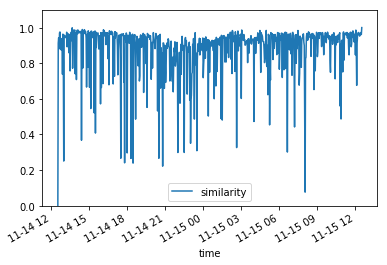

In [27]:
new_df.plot()
plt.ylim(0)
plt.show()


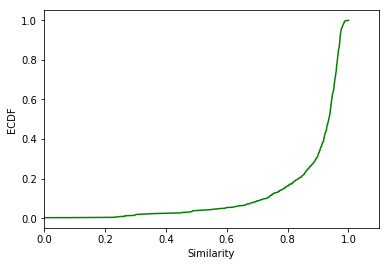

In [28]:
plt.plot(getECDF(new_df), color= 'green', linestyle='-')
plt.xlabel('Similarity')
plt.ylabel('ECDF')
plt.xlim(0)
plt.show()

In [323]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))] 
    print(dirs)
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        data = data.append(client_data, ignore_index=True)
    return data

data = read_clients("similarity_new")
data = data.set_index(pd.DatetimeIndex(data['time']))
data = data.resample('2Min').mean()


['result2.csv', 'result3.csv', 'result0.csv', 'result1.csv']


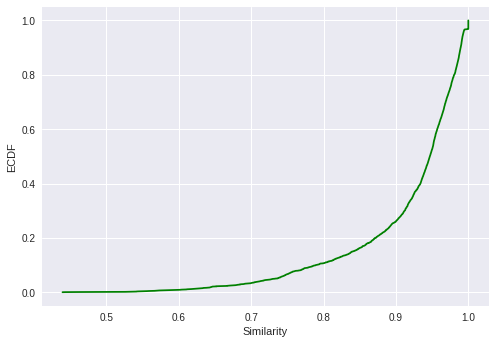

In [330]:
plt.plot(getECDF(data), color= 'green', linestyle='-')
plt.xlabel('Similarity')
plt.ylabel('ECDF')
plt.show()

In [326]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))] 
    print(dirs)
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        data = data.append(client_data, ignore_index=True)
    return data

data_no_latency = read_clients("similarity")
data_no_latency = data_no_latency.set_index(pd.DatetimeIndex(data_no_latency['time']))
data_no_latency = data_no_latency.resample('2Min').mean()


['result5.csv', 'result17.csv', 'result4.csv', 'result6.csv', 'result.csv', 'result13.csv', 'result12.csv', 'result15.csv', 'result16.csv', 'result10.csv', 'result3.csv', 'result8.csv', 'result14.csv', 'result18.csv', 'result9.csv', 'result11.csv', 'result7.csv', 'result1.csv']


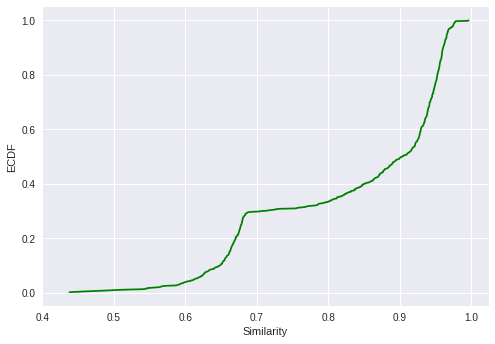

In [329]:
plt.plot(getECDF(data_no_latency), color= 'green', linestyle='-')
plt.xlabel('Similarity')
plt.ylabel('ECDF')
plt.xlim(0.4)
plt.show()

In [346]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway', 'latency']

#Read input files from the directory and returns DataTable object in a combined list
def read_delayed(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = {}
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data = client_data.query("latency != 0.15")
        #print(len(client_data))
        data[client] = client_data.resample('2Min')['gateway','latency']
    return data

data1 = read_delayed("similarity_delay")
print(data1)

{'gw12.csv': <pandas.core.groupby.DataFrameGroupBy object at 0x7f0606e934e0>, 'gw11.csv': <pandas.core.groupby.DataFrameGroupBy object at 0x7f0606e93710>, 'gw13.csv': <pandas.core.groupby.DataFrameGroupBy object at 0x7f0606e93c88>, 'gw10.csv': <pandas.core.groupby.DataFrameGroupBy object at 0x7f0606e93b38>, 'gw23.csv': <pandas.core.groupby.DataFrameGroupBy object at 0x7f06001dca58>, 'gw8.csv': <pandas.core.groupby.DataFrameGroupBy object at 0x7f06001dcef0>, 'gw3.csv': <pandas.core.groupby.DataFrameGroupBy object at 0x7f06001dc7b8>}


In [347]:

elements = list(data1.keys()) #20
size = len(data1[list(elements)[0]]) #721
j=0


while j<len(elements):
    i=0
    test1 = {}
    keys = {}
    compared = list(data1[elements[j]])
    size = len(compared)
    result = pd.DataFrame()
    while i<size:
        avg = 0
        for element in elements:
            if element == elements[j]:
                continue
            test = list(data1[element])
            if len(test)<len(compared):
                size  = len(test)
            #while(i<size):
            date = list(data1[element])[i][0]
            comp = compared[i][1]
            comp = comp.drop(columns=['time'])
            comp = comp.set_index('gateway')
            test1 = comp.T.to_dict('list')

            temp =  list(data1[element])[i][1]
            temp = temp.drop(columns=['time'])
            temp = temp.set_index('gateway')
            test2 = temp.T.to_dict('list')

            avg += cosine_similarity(test1, test2)

        print(date,':',avg/(len(elements)-1))
        result = result.append({'time':date, 'similarity':avg/(len(elements)-1)}, ignore_index=True)
        i+=1

    result = result.set_index('time')
    result.to_csv('similarity_delay/result'+str(j)+'.csv')
    j +=1

2018-11-22 12:58:00 : 0.9479774011403949
2018-11-22 13:00:00 : 0.8661334324659101
2018-11-22 13:02:00 : 0.8565983816999897
2018-11-22 13:04:00 : 0.9784662150001212
2018-11-22 13:06:00 : 0.9847694071705552
2018-11-22 13:08:00 : 0.9570475389447589
2018-11-22 13:10:00 : 0.9919518562879753
2018-11-22 13:12:00 : 0.9918069558552775
2018-11-22 13:14:00 : 0.9932718298978456
2018-11-22 13:16:00 : 0.9887313407137642
2018-11-22 13:18:00 : 0.9626320602458044
2018-11-22 13:20:00 : 0.9868245772783363
2018-11-22 13:22:00 : 0.9243440971087797
2018-11-22 13:24:00 : 0.8138507549383359
2018-11-22 13:26:00 : 0.991495362671816
2018-11-22 13:28:00 : 0.9911396121870091
2018-11-22 13:30:00 : 0.8737815743111361
2018-11-22 13:32:00 : 0.778771180004172
2018-11-22 13:34:00 : 0.9887240336705533
2018-11-22 13:36:00 : 0.9915287260372354
2018-11-22 13:38:00 : 0.9861654339596629
2018-11-22 13:40:00 : 0.97828167288225
2018-11-22 13:42:00 : 0.9907626389704919
2018-11-22 13:44:00 : 0.9527944026574624
2018-11-22 13:46:00 

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: DataFrame columns are not unique, some columns will be omitted.
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: DataFrame columns are not unique, some columns will be omitted.


 -1.0
2018-11-22 16:24:00 : 0.975378818781005
2018-11-22 16:26:00 : 0.9812133071975189
2018-11-22 16:28:00 : 0.9889659420425995
2018-11-22 16:30:00 : 0.9404520880286041
2018-11-22 16:32:00 : 0.723135528743378
2018-11-22 16:34:00 : 0.9506064070991588
2018-11-22 16:36:00 : 0.9807375701934906
2018-11-22 16:38:00 : 0.9860996955828947
2018-11-22 16:40:00 : 0.9839323170031552
2018-11-22 16:42:00 : 0.8647265481212444
2018-11-22 16:44:00 : 0.9722469350901437
2018-11-22 16:46:00 : 0.9414801445994669
2018-11-22 16:48:00 : 0.9308347562994276
2018-11-22 16:50:00 : 0.9629546965239865
2018-11-22 16:52:00 : 0.5447476040174252
2018-11-22 16:54:00 : 0.9761299764695898
2018-11-22 16:56:00 : 0.9758744730670394
2018-11-22 16:58:00 : 0.9408651914842513
2018-11-22 17:00:00 : 0.9053783286429021
2018-11-22 17:02:00 : 0.9351923809794022
2018-11-22 17:04:00 : 0.9728680231666064
2018-11-22 17:06:00 : 0.9745631483750855
2018-11-22 17:08:00 : 0.9745959670106069
2018-11-22 17:10:00 : 0.9746595028779961
2018-11-22 1

2018-11-23 05:44:00 : 0.9815045179148502
2018-11-23 05:46:00 : 0.8525678090498592
2018-11-23 05:48:00 : 0.9888191493226657
2018-11-23 05:50:00 : 0.9895278121349138
2018-11-23 05:52:00 : 0.942874589448384
2018-11-23 05:54:00 : 0.9844547090798098
2018-11-23 05:56:00 : 0.9897682724286075
2018-11-23 05:58:00 : 0.9766749926583573
2018-11-23 06:00:00 : 0.8682655141642877
2018-11-23 06:02:00 : 0.850293391114687
2018-11-23 06:04:00 : 0.9832612399695106
2018-11-23 06:06:00 : 0.9835017389343257
2018-11-23 06:08:00 : 0.9565888122116265
2018-11-23 06:10:00 : 0.982849027044154
2018-11-23 06:12:00 : 0.9887996211732282
2018-11-23 06:14:00 : 0.21776449711902848
2018-11-23 06:16:00 : 0.9505451139508695
2018-11-23 06:18:00 : 0.9871195500801422
2018-11-23 06:20:00 : 0.991337096397372
2018-11-23 06:22:00 : 0.9913239451799662
2018-11-23 06:24:00 : 0.9880084767260922
2018-11-23 06:26:00 : 0.9856138205389248
2018-11-23 06:28:00 : 0.8590130197942297
2018-11-23 06:30:00 : 0.8154700905170329
2018-11-23 06:32:00

2018-11-23 12:26:00 : 0.9796569847171058
2018-11-23 12:28:00 : 0.9768049823621568
2018-11-23 12:30:00 : 0.8880298138259116
2018-11-23 12:32:00 : 0.8870686235502441
2018-11-23 12:34:00 : 0.9877602677268608
2018-11-23 12:36:00 : 0.9851561184212256
2018-11-23 12:38:00 : 0.9929720814098828
2018-11-23 12:40:00 : 0.9701815080187014
2018-11-23 12:42:00 : 0.9932911975238468
2018-11-23 12:44:00 : 0.9893634771023456
2018-11-23 12:46:00 : 0.9887949092462955
2018-11-23 12:48:00 : 0.8162751517455819
2018-11-23 12:50:00 : 0.991966701536497
2018-11-23 12:52:00 : 0.9318862943403511
2018-11-23 12:54:00 : 0.9797562363820823
2018-11-23 12:56:00 : 0.982539601635509
2018-11-23 12:58:00 : 0.9656228655862044
2018-11-23 13:00:00 : 0.9889709315495604
2018-11-23 13:02:00 : 0.9259909313593112
2018-11-23 13:04:00 : 0.9898744693916329
2018-11-23 13:06:00 : 0.9916961440612342
2018-11-23 13:08:00 : 0.8141453559212186
2018-11-23 13:10:00 : 0.9911659750438163
2018-11-23 13:12:00 : 0.9914182743452731
2018-11-23 13:14:0

2018-11-23 19:08:00 : 0.9908793562855974
2018-11-23 19:10:00 : 0.9632701941161151
2018-11-23 19:12:00 : 0.9886598785086952
2018-11-23 19:14:00 : 0.9875286392830175
2018-11-23 19:16:00 : 0.9862363412998864
2018-11-23 19:18:00 : 0.9641981466801021
2018-11-23 19:20:00 : 0.97754438757761
2018-11-23 19:22:00 : 0.9851325851028242
2018-11-23 19:24:00 : 0.9933241352871112
2018-11-23 19:26:00 : 0.8459213453394328
2018-11-23 19:28:00 : 0.9913574560493608
2018-11-23 19:30:00 : 0.9070610397303448
2018-11-23 19:32:00 : 0.6483859397653574
2018-11-23 19:34:00 : 0.987253407592398
2018-11-23 19:36:00 : 0.9348185035036979
2018-11-23 19:38:00 : 0.9063547837787507
2018-11-23 19:40:00 : 0.9677463055854209
2018-11-23 19:42:00 : 0.8821911004701638
2018-11-23 19:44:00 : 0.9837235047826153
2018-11-23 19:46:00 : 0.9886150647045229
2018-11-23 19:48:00 : 0.9712192434340615
2018-11-23 19:50:00 : 0.9700463158276665
2018-11-23 19:52:00 : 0.9711235237665105
2018-11-23 19:54:00 : 0.9621430520093628
2018-11-23 19:56:00

2018-11-24 01:50:00 : 0.9909587562173888
2018-11-24 01:52:00 : 0.9888287812946838
2018-11-24 01:54:00 : 0.9842243907043663
2018-11-24 01:56:00 : 0.9825597189583061
2018-11-24 01:58:00 : 0.9733311823871663
2018-11-24 02:00:00 : 0.6854372257379947
2018-11-24 02:02:00 : 0.8747021242272216
2018-11-24 02:04:00 : 0.9375978680933064
2018-11-24 02:06:00 : 0.9872754839901982
2018-11-24 02:08:00 : 0.9896012659419405
2018-11-24 02:10:00 : 0.6443547327029101
2018-11-24 02:12:00 : 0.9897299822083797
2018-11-24 02:14:00 : 0.8501566535220432
2018-11-24 02:16:00 : 0.9774097945115731
2018-11-24 02:18:00 : 0.9606282414638954
2018-11-24 02:20:00 : 0.9930884628839571
2018-11-24 02:22:00 : 0.8893878767177595
2018-11-24 02:24:00 : 0.902594172140312
2018-11-24 02:26:00 : 0.9823720777331008
2018-11-24 02:28:00 : 0.871627841480783
2018-11-24 02:30:00 : 0.9165277927971639
2018-11-24 02:32:00 : 0.98163333233367
2018-11-24 02:34:00 : 0.9322306212315655
2018-11-24 02:36:00 : 0.9799300960443801
2018-11-24 02:38:00 

2018-11-22 22:08:00 : 0.9899271424261964
2018-11-22 22:10:00 : 0.9788007473171277
2018-11-22 22:12:00 : 0.9542719811468169
2018-11-22 22:14:00 : 0.9720811348613755
2018-11-22 22:16:00 : 0.9873347357811898
2018-11-22 22:18:00 : 0.971474665538488
2018-11-22 22:20:00 : 0.9859247723219865
2018-11-22 22:22:00 : 0.9641818060612631
2018-11-22 22:24:00 : 0.6627369429140267
2018-11-22 22:26:00 : 0.977828541612241
2018-11-22 22:28:00 : 0.8083272356903916
2018-11-22 22:30:00 : 0.9102607040392942
2018-11-22 22:32:00 : 0.9185415957200725
2018-11-22 22:34:00 : 0.9052814244256484
2018-11-22 22:36:00 : 0.9795066597662507
2018-11-22 22:38:00 : 0.9656590412749425
2018-11-22 22:40:00 : 0.98459660741851
2018-11-22 22:42:00 : 0.34830853365421005
2018-11-22 22:44:00 : 0.9642876009927713
2018-11-22 22:46:00 : 0.9836860529868395
2018-11-22 22:48:00 : 0.9779722589427267
2018-11-22 22:50:00 : 0.9863371411884446
2018-11-22 22:52:00 : 0.9830661982181234
2018-11-22 22:54:00 : 0.9862215796453245
2018-11-22 22:56:00

2018-11-23 11:30:00 : 0.823500362089442
2018-11-23 11:32:00 : 0.8644572005226673
2018-11-23 11:34:00 : 0.9903712382997413
2018-11-23 11:36:00 : 0.9897762445486644
2018-11-23 11:38:00 : 0.9561345195985141
2018-11-23 11:40:00 : 0.9920576257944781
2018-11-23 11:42:00 : 0.983570329935112
2018-11-23 11:44:00 : 0.9876828288302701
2018-11-23 11:46:00 : 0.9916880289893425
2018-11-23 11:48:00 : 0.9883440303541717
2018-11-23 11:50:00 : 0.9815099058819942
2018-11-23 11:52:00 : 0.9945044314878446
2018-11-23 11:54:00 : 0.9939686850454182
2018-11-23 11:56:00 : 0.9861439197649023
2018-11-23 11:58:00 : 0.9938676975110319
2018-11-23 12:00:00 : 0.8708678855495849
2018-11-23 12:02:00 : 0.9908743251335089
2018-11-23 12:04:00 : 0.9305732928259526
2018-11-23 12:06:00 : 0.9766929555538232
2018-11-23 12:08:00 : 0.9937474211968426
2018-11-23 12:10:00 : 0.9767003769641968
2018-11-23 12:12:00 : 0.9894037897219725
2018-11-23 12:14:00 : 0.9208524091564426
2018-11-23 12:16:00 : 0.9802114220517288
2018-11-23 12:18:0

2018-11-24 00:52:00 : 0.9112770702217415
2018-11-24 00:54:00 : 0.9846278066879871
2018-11-24 00:56:00 : 0.9916627150425278
2018-11-24 00:58:00 : 0.8855390049290349
2018-11-24 01:00:00 : 0.8089001435105819
2018-11-24 01:02:00 : 0.8664011181617606
2018-11-24 01:04:00 : 0.9710049270605609
2018-11-24 01:06:00 : 0.983162534010428
2018-11-24 01:08:00 : 0.911246998590308
2018-11-24 01:10:00 : 0.9858062937337544
2018-11-24 01:12:00 : -1.0
2018-11-24 01:14:00 : 0.9872987085651119
2018-11-24 01:16:00 : 0.9287445142237994
2018-11-24 01:18:00 : 0.9404564715225076
2018-11-24 01:20:00 : 0.9782709250117237
2018-11-24 01:22:00 : 0.9873662225313627
2018-11-24 01:24:00 : 0.979411169315067
2018-11-24 01:26:00 : 0.9626599421558811
2018-11-24 01:28:00 : 0.8502755072850561
2018-11-24 01:30:00 : 0.9406567044990767
2018-11-24 01:32:00 : 0.7891438728960886
2018-11-24 01:34:00 : 0.9930889773016177
2018-11-24 01:36:00 : 0.9894359245429523
2018-11-24 01:38:00 : 0.9748236932707047
2018-11-24 01:40:00 : 0.969759503

2018-11-22 14:30:00 : 0.8936548988482476
2018-11-22 14:32:00 : 0.9915136318781229
2018-11-22 14:34:00 : 0.9819747468625959
2018-11-22 14:36:00 : 0.9774968141262778
2018-11-22 14:38:00 : 0.986253826735959
2018-11-22 14:40:00 : 0.9899156576171501
2018-11-22 14:42:00 : 0.8770373883597936
2018-11-22 14:44:00 : 0.9878366690491663
2018-11-22 14:46:00 : 0.9904711275259488
2018-11-22 14:48:00 : 0.9731703822260015
2018-11-22 14:50:00 : 0.9876077187138651
2018-11-22 14:52:00 : 0.8370737735723045
2018-11-22 14:54:00 : 0.9170861592505664
2018-11-22 14:56:00 : 0.9545078091762554
2018-11-22 14:58:00 : 0.9806877470964638
2018-11-22 15:00:00 : 0.8536440606322127
2018-11-22 15:02:00 : 0.6780440292220048
2018-11-22 15:04:00 : 0.9946181329066786
2018-11-22 15:06:00 : 0.9769011028748421
2018-11-22 15:08:00 : 0.9594441849569516
2018-11-22 15:10:00 : 0.9860716624731148
2018-11-22 15:12:00 : 0.4677012926090915
2018-11-22 15:14:00 : 0.9936275290283701
2018-11-22 15:16:00 : 0.9820886974795832
2018-11-22 15:18:

2018-11-23 03:50:00 : 0.9850354696395721
2018-11-23 03:52:00 : 0.989787834213966
2018-11-23 03:54:00 : 0.9880528133444778
2018-11-23 03:56:00 : 0.9897250702633559
2018-11-23 03:58:00 : 0.5704832797868911
2018-11-23 04:00:00 : 0.8485501921689403
2018-11-23 04:02:00 : 0.9112752515150447
2018-11-23 04:04:00 : 0.9906175889720635
2018-11-23 04:06:00 : 0.9929828546097738
2018-11-23 04:08:00 : 0.9906120884107703
2018-11-23 04:10:00 : 0.9909929050906287
2018-11-23 04:12:00 : 0.9601372003048825
2018-11-23 04:14:00 : 0.8183481612342608
2018-11-23 04:16:00 : 0.991767154935721
2018-11-23 04:18:00 : 0.9917858776024545
2018-11-23 04:20:00 : 0.9755905305627701
2018-11-23 04:22:00 : 0.9861406115284724
2018-11-23 04:24:00 : 0.8109836029953946
2018-11-23 04:26:00 : 0.9818580013979226
2018-11-23 04:28:00 : 0.9904168858030707
2018-11-23 04:30:00 : 0.8555822490678144
2018-11-23 04:32:00 : 0.7691825912363802
2018-11-23 04:34:00 : 0.9799553854368499
2018-11-23 04:36:00 : 0.9911201992235054
2018-11-23 04:38:0

2018-11-23 17:10:00 : 0.9930595413047785
2018-11-23 17:12:00 : 0.9463836299167471
2018-11-23 17:14:00 : 0.9932262505397652
2018-11-23 17:16:00 : 0.992334100705612
2018-11-23 17:18:00 : 0.8227413631190522
2018-11-23 17:20:00 : 0.9779413290732492
2018-11-23 17:22:00 : 0.9952533569481098
2018-11-23 17:24:00 : 0.9895427956100443
2018-11-23 17:26:00 : 0.9785069945742345
2018-11-23 17:28:00 : -0.000685535154299218
2018-11-23 17:30:00 : 0.5904457738170692
2018-11-23 17:32:00 : 0.7765506102476362
2018-11-23 17:34:00 : 0.7814369348307871
2018-11-23 17:36:00 : 0.7805745311834756
2018-11-23 17:38:00 : -1.0
2018-11-23 17:40:00 : 0.9283724176421023
2018-11-23 17:42:00 : 0.9321030310323044
2018-11-23 17:44:00 : 0.9592289836622191
2018-11-23 17:46:00 : 0.7342660298337945
2018-11-23 17:48:00 : 0.7651948808020589
2018-11-23 17:50:00 : 0.7461399911959798
2018-11-23 17:52:00 : 0.7412478521914503
2018-11-23 17:54:00 : 0.8437781348060431
2018-11-23 17:56:00 : 0.8395908733364302
2018-11-23 17:58:00 : 0.8992

2018-11-22 13:28:00 : 0.9956520940659296
2018-11-22 13:30:00 : 0.8554925016595624
2018-11-22 13:32:00 : 0.7844869769923765
2018-11-22 13:34:00 : 0.9848202630339972
2018-11-22 13:36:00 : 0.9937381494236625
2018-11-22 13:38:00 : 0.979471371908231
2018-11-22 13:40:00 : 0.9908161560043576
2018-11-22 13:42:00 : 0.9926850265095628
2018-11-22 13:44:00 : 0.9573847840629978
2018-11-22 13:46:00 : 0.9908958372473379
2018-11-22 13:48:00 : 0.9882313349895817
2018-11-22 13:50:00 : 0.9296403656096697
2018-11-22 13:52:00 : 0.6812306073710408
2018-11-22 13:54:00 : 0.980954086442836
2018-11-22 13:56:00 : 0.8690236362926133
2018-11-22 13:58:00 : 0.9556480190611015
2018-11-22 14:00:00 : 0.810329609412383
2018-11-22 14:02:00 : 0.8663667147074694
2018-11-22 14:04:00 : 0.9942303303803713
2018-11-22 14:06:00 : 0.9905220733410186
2018-11-22 14:08:00 : 0.9641441845017898
2018-11-22 14:10:00 : 0.9826447060876159
2018-11-22 14:12:00 : 0.9891304121775554
2018-11-22 14:14:00 : 0.9716299538615344
2018-11-22 14:16:00

2018-11-22 20:10:00 : 0.9257757903638
2018-11-22 20:12:00 : 0.9321400168043636
2018-11-22 20:14:00 : 0.8809985517688507
2018-11-22 20:16:00 : 0.8871063667878553
2018-11-22 20:18:00 : 0.7602690219054073
2018-11-22 20:20:00 : 0.9642425429184733
2018-11-22 20:22:00 : 0.9535993219170097
2018-11-22 20:24:00 : 0.6315786930743924
2018-11-22 20:26:00 : 0.9312205217304523
2018-11-22 20:28:00 : 0.9646719081115075
2018-11-22 20:30:00 : 0.8434671601576733
2018-11-22 20:32:00 : 0.954210836917944
2018-11-22 20:34:00 : 0.9340552528040673
2018-11-22 20:36:00 : 0.9732182950892992
2018-11-22 20:38:00 : 0.8729474369788003
2018-11-22 20:40:00 : 0.9017655914826497
2018-11-22 20:42:00 : 0.500423417211252
2018-11-22 20:44:00 : 0.8731897976646663
2018-11-22 20:46:00 : 0.8012902009525192
2018-11-22 20:48:00 : 0.9807999742971828
2018-11-22 20:50:00 : 0.9469045454453725
2018-11-22 20:52:00 : 0.8665253403390575
2018-11-22 20:54:00 : 0.9650038722656381
2018-11-22 20:56:00 : 0.9358270167227456
2018-11-22 20:58:00 :

2018-11-23 09:30:00 : 0.8860136560914532
2018-11-23 09:32:00 : 0.9928488894246928
2018-11-23 09:34:00 : 0.9900905028528371
2018-11-23 09:36:00 : 0.9769866873630599
2018-11-23 09:38:00 : 0.9946612202344762
2018-11-23 09:40:00 : 0.9933317995948655
2018-11-23 09:42:00 : 0.904570411207148
2018-11-23 09:44:00 : 0.9216248179277503
2018-11-23 09:46:00 : 0.9944621316340915
2018-11-23 09:48:00 : 0.9952446102424642
2018-11-23 09:50:00 : 0.9946340521305163
2018-11-23 09:52:00 : 0.9156579782523585
2018-11-23 09:54:00 : 0.9953054937251751
2018-11-23 09:56:00 : 0.9950525682523765
2018-11-23 09:58:00 : 0.9877577481596749
2018-11-23 10:00:00 : 0.8808679940457531
2018-11-23 10:02:00 : 0.9391408192975804
2018-11-23 10:04:00 : 0.9930351143010788
2018-11-23 10:06:00 : 0.9923562814688053
2018-11-23 10:08:00 : 0.8841795375043257
2018-11-23 10:10:00 : 0.9960720606314301
2018-11-23 10:12:00 : 0.989784030227084
2018-11-23 10:14:00 : 0.9927366090096957
2018-11-23 10:16:00 : 0.9902200794122756
2018-11-23 10:18:0

2018-11-23 16:12:00 : 0.8900443817051743
2018-11-23 16:14:00 : 0.9874093478674858
2018-11-23 16:16:00 : 0.996463463051719
2018-11-23 16:18:00 : 0.5373122819998234
2018-11-23 16:20:00 : 0.9919132965291467
2018-11-23 16:22:00 : 0.9380739010939924
2018-11-23 16:24:00 : 0.991854720916325
2018-11-23 16:26:00 : 0.9900488875611054
2018-11-23 16:28:00 : 0.9945784775565989
2018-11-23 16:30:00 : 0.8513156271915935
2018-11-23 16:32:00 : 0.6905463680621179
2018-11-23 16:34:00 : 0.9905598952423351
2018-11-23 16:36:00 : 0.9909356572561271
2018-11-23 16:38:00 : 0.9934354478798176
2018-11-23 16:40:00 : 0.917135980383953
2018-11-23 16:42:00 : 0.9941439886769597
2018-11-23 16:44:00 : 0.99385881141907
2018-11-23 16:46:00 : 0.9931217030982192
2018-11-23 16:48:00 : 0.826552609281383
2018-11-23 16:50:00 : 0.9906969159977067
2018-11-23 16:52:00 : 0.9778379054750506
2018-11-23 16:54:00 : 0.9917721458615042
2018-11-23 16:56:00 : 0.9766632449128677
2018-11-23 16:58:00 : 0.8380546367304555
2018-11-23 17:00:00 : 

2018-11-23 22:54:00 : 0.9962732404888253
2018-11-23 22:56:00 : 0.9925288261919668
2018-11-23 22:58:00 : 0.8806914802218947
2018-11-23 23:00:00 : 0.9263050867969579
2018-11-23 23:02:00 : 0.9712111927021602
2018-11-23 23:04:00 : 0.9874277261398738
2018-11-23 23:06:00 : 0.9770396031106784
2018-11-23 23:08:00 : 0.9821219945335068
2018-11-23 23:10:00 : 0.942306487359461
2018-11-23 23:12:00 : 0.8825839159605504
2018-11-23 23:14:00 : 0.9672140508449188
2018-11-23 23:16:00 : 0.9973132022000168
2018-11-23 23:18:00 : 0.9827356384025926
2018-11-23 23:20:00 : 0.985057920053364
2018-11-23 23:22:00 : 0.9806846142292893
2018-11-23 23:24:00 : 0.9596137206536963
2018-11-23 23:26:00 : 0.9872997851961026
2018-11-23 23:28:00 : 0.9930787344648212
2018-11-23 23:30:00 : 0.9432480503015371
2018-11-23 23:32:00 : 0.8492619527182766
2018-11-23 23:34:00 : 0.9826271631453624
2018-11-23 23:36:00 : 0.9919714261848295
2018-11-23 23:38:00 : 0.9682139178252437
2018-11-23 23:40:00 : 0.9797868727101818
2018-11-23 23:42:0

2018-11-24 05:36:00 : 0.9544057724489917
2018-11-24 05:38:00 : 0.9135176371073856
2018-11-24 05:40:00 : 0.8808843009131412
2018-11-24 05:42:00 : 0.9845939563718397
2018-11-24 05:44:00 : 0.994161331828504
2018-11-24 05:46:00 : 0.9670792299279981
2018-11-24 05:48:00 : 0.6524043784341234
2018-11-24 05:50:00 : 0.9631497176882062
2018-11-24 05:52:00 : 0.9619575109592237
2018-11-24 05:54:00 : 0.9938870985436199
2018-11-24 05:56:00 : 0.9924776051874525
2018-11-24 05:58:00 : 0.9540434940847033
2018-11-24 06:00:00 : 0.8897103308171953
2018-11-22 12:58:00 : 0.9375146600103172
2018-11-22 13:00:00 : 0.833971623113177
2018-11-22 13:02:00 : 0.8218256647030566
2018-11-22 13:04:00 : 0.958390744230797
2018-11-22 13:06:00 : 0.9651606400869821
2018-11-22 13:08:00 : 0.8969595274532886
2018-11-22 13:10:00 : 0.9657254432511176
2018-11-22 13:12:00 : 0.97952676334498
2018-11-22 13:14:00 : 0.9914210928239574
2018-11-22 13:16:00 : 0.9702564262202845
2018-11-22 13:18:00 : 0.9515607393645579
2018-11-22 13:20:00 :

2018-11-23 01:54:00 : 0.8998961212518194
2018-11-23 01:56:00 : 0.9756013131047666
2018-11-23 01:58:00 : 0.9773204931181957
2018-11-23 02:00:00 : 0.8493861319992537
2018-11-23 02:02:00 : 0.8912320022793739
2018-11-23 02:04:00 : 0.9803159261642213
2018-11-23 02:06:00 : 0.9596911825835033
2018-11-23 02:08:00 : 0.9707611472398225
2018-11-23 02:10:00 : 0.9687224476572207
2018-11-23 02:12:00 : 0.9738959146548295
2018-11-23 02:14:00 : 0.8358850959093527
2018-11-23 02:16:00 : 0.9683405109931317
2018-11-23 02:18:00 : 0.9799242670621573
2018-11-23 02:20:00 : 0.9691067940093911
2018-11-23 02:22:00 : 0.9201012749541468
2018-11-23 02:24:00 : 0.9783430631150513
2018-11-23 02:26:00 : 0.9755547066605623
2018-11-23 02:28:00 : 0.8824715509044759
2018-11-23 02:30:00 : 0.8595103469854429
2018-11-23 02:32:00 : 0.9681201225484636
2018-11-23 02:34:00 : 0.983945123934177
2018-11-23 02:36:00 : 0.9614245221052982
2018-11-23 02:38:00 : 0.9896372597601083
2018-11-23 02:40:00 : 0.9436166492226753
2018-11-23 02:42:

2018-11-23 15:14:00 : 0.9608933179127191
2018-11-23 15:16:00 : 0.9920815595901535
2018-11-23 15:18:00 : 0.9888553497422228
2018-11-23 15:20:00 : 0.9898940283524258
2018-11-23 15:22:00 : 0.9027904073501296
2018-11-23 15:24:00 : 0.962103434658816
2018-11-23 15:26:00 : 0.9711668755969444
2018-11-23 15:28:00 : 0.845875914461126
2018-11-23 15:30:00 : 0.8839852597803107
2018-11-23 15:32:00 : 0.8664668996102357
2018-11-23 15:34:00 : 0.9680763669895729
2018-11-23 15:36:00 : 0.9926437351282579
2018-11-23 15:38:00 : 0.8301271039182575
2018-11-23 15:40:00 : 0.9008642123369329
2018-11-23 15:42:00 : 0.9885215976984042
2018-11-23 15:44:00 : 0.9922431381601378
2018-11-23 15:46:00 : 0.9925055585446705
2018-11-23 15:48:00 : 0.8442743507472542
2018-11-23 15:50:00 : 0.9584676408613938
2018-11-23 15:52:00 : 0.9871246469673203
2018-11-23 15:54:00 : 0.984936425843702
2018-11-23 15:56:00 : 0.9905025106063933
2018-11-23 15:58:00 : 0.7282230546482519
2018-11-23 16:00:00 : 0.9038956282018628
2018-11-23 16:02:00

2018-11-23 21:56:00 : 0.9695564025250797
2018-11-23 21:58:00 : 0.9224462403440722
2018-11-23 22:00:00 : 0.8956296510206827
2018-11-23 22:02:00 : 0.9326028403208272
2018-11-23 22:04:00 : 0.9590027317372232
2018-11-23 22:06:00 : 0.9801758672200641
2018-11-23 22:08:00 : 0.7926700819226844
2018-11-23 22:10:00 : 0.9482245717554413
2018-11-23 22:12:00 : 0.9227240739148476
2018-11-23 22:14:00 : 0.9617260407264293
2018-11-23 22:16:00 : 0.960283055189466
2018-11-23 22:18:00 : 0.9435787435954724
2018-11-23 22:20:00 : 0.9836107102568499
2018-11-23 22:22:00 : 0.9918030292764973
2018-11-23 22:24:00 : 0.9501267984279727
2018-11-23 22:26:00 : 0.9369591294133371
2018-11-23 22:28:00 : 0.8664587727090122
2018-11-23 22:30:00 : 0.8801104914559872
2018-11-23 22:32:00 : 0.9902894414761158
2018-11-23 22:34:00 : 0.9931890735258003
2018-11-23 22:36:00 : 0.9909111301893659
2018-11-23 22:38:00 : 0.9697289515652301
2018-11-23 22:40:00 : 0.9344516672995921
2018-11-23 22:42:00 : 0.9931413740454337
2018-11-23 22:44:

2018-11-22 18:12:00 : 0.8820328551361142
2018-11-22 18:14:00 : 0.8676688668084421
2018-11-22 18:16:00 : 0.9737162955947086
2018-11-22 18:18:00 : 0.9788127559469669
2018-11-22 18:20:00 : 0.9790787405813393
2018-11-22 18:22:00 : 0.9153720354356502
2018-11-22 18:24:00 : 0.980415998004089
2018-11-22 18:26:00 : 0.9808616233337523
2018-11-22 18:28:00 : 0.9294824924421956
2018-11-22 18:30:00 : 0.7721304589210126
2018-11-22 18:32:00 : 0.9620576307273585
2018-11-22 18:34:00 : 0.9690237979211592
2018-11-22 18:36:00 : 0.9734238620388559
2018-11-22 18:38:00 : 0.9081597858017624
2018-11-22 18:40:00 : 0.9482661216174021
2018-11-22 18:42:00 : 0.8218813680244672
2018-11-22 18:44:00 : 0.9714139808093862
2018-11-22 18:46:00 : 0.9300642634875625
2018-11-22 18:48:00 : 0.9781781987919135
2018-11-22 18:50:00 : 0.9617857205071944
2018-11-22 18:52:00 : 0.9636817662017503
2018-11-22 18:54:00 : 0.9734694654000539
2018-11-22 18:56:00 : 0.7214977013268413
2018-11-22 18:58:00 : 0.9355631475370121
2018-11-22 19:00:

2018-11-23 00:54:00 : 0.8848219090619406
2018-11-23 00:56:00 : 0.9824329992072066
2018-11-23 00:58:00 : 0.8975264763201828
2018-11-23 01:00:00 : 0.6634246804050857
2018-11-23 01:02:00 : 0.963240374945462
2018-11-23 01:04:00 : 0.9756557503671578
2018-11-23 01:06:00 : 0.9384859190090956
2018-11-23 01:08:00 : 0.7712943695656608
2018-11-23 01:10:00 : 0.9804947908546612
2018-11-23 01:12:00 : 0.9275906897565912
2018-11-23 01:14:00 : 0.9743911508911068
2018-11-23 01:16:00 : 0.9343524614188076
2018-11-23 01:18:00 : 0.9792861813177791
2018-11-23 01:20:00 : 0.9788545788836244
2018-11-23 01:22:00 : 0.9762715240018761
2018-11-23 01:24:00 : 0.9741253242611702
2018-11-23 01:26:00 : 0.9606370559178732
2018-11-23 01:28:00 : 0.9791835441332281
2018-11-23 01:30:00 : 0.7323009763625336
2018-11-23 01:32:00 : 0.9750024897538775
2018-11-23 01:34:00 : 0.9699944154035102
2018-11-23 01:36:00 : 0.9315627358209834
2018-11-23 01:38:00 : 0.9796777818108868
2018-11-23 01:40:00 : 0.9806905535130567
2018-11-23 01:42:

2018-11-23 14:14:00 : 0.9860681051571939
2018-11-23 14:16:00 : 0.84585432455631
2018-11-23 14:18:00 : 0.5672790766521264
2018-11-23 14:20:00 : 0.9887821411190162
2018-11-23 14:22:00 : 0.9890892552262572
2018-11-23 14:24:00 : 0.9677857702178941
2018-11-23 14:26:00 : 0.9481418168561112
2018-11-23 14:28:00 : 0.7083130887946728
2018-11-23 14:30:00 : 0.6496771122162887
2018-11-23 14:32:00 : 0.8618389574138193
2018-11-23 14:34:00 : 0.9579353489217391
2018-11-23 14:36:00 : 0.9876155199570515
2018-11-23 14:38:00 : 0.7383530456190126
2018-11-23 14:40:00 : 0.9661733863085552
2018-11-23 14:42:00 : 0.982291542528535
2018-11-23 14:44:00 : 0.9896827621729608
2018-11-23 14:46:00 : 0.7683575471864676
2018-11-23 14:48:00 : 0.7887103838320991
2018-11-23 14:50:00 : 0.9727409557433598
2018-11-23 14:52:00 : 0.8616865277893538
2018-11-23 14:54:00 : 0.8714637357707039
2018-11-23 14:56:00 : 0.9788594476809388
2018-11-23 14:58:00 : 0.9742589113741947
2018-11-23 15:00:00 : 0.9325798096665926
2018-11-23 15:02:00

2018-11-23 20:56:00 : 0.9472809538010151
2018-11-23 20:58:00 : 0.9580196946938205
2018-11-23 21:00:00 : 0.8672151604116539
2018-11-23 21:02:00 : 0.9736498645236488
2018-11-23 21:04:00 : 0.9614946745890731
2018-11-23 21:06:00 : 0.9351809877324048
2018-11-23 21:08:00 : 0.9213029452591789
2018-11-23 21:10:00 : 0.8444936871575947
2018-11-23 21:12:00 : 0.9424458877431047
2018-11-23 21:14:00 : 0.9791988341694808
2018-11-23 21:16:00 : 0.9476577312063094
2018-11-23 21:18:00 : 0.8635354220581405
2018-11-23 21:20:00 : 0.8914300113465247
2018-11-23 21:22:00 : 0.8850474584182318
2018-11-23 21:24:00 : 0.9505032476581045
2018-11-23 21:26:00 : 0.9754487290536952
2018-11-23 21:28:00 : 0.8967258569335878
2018-11-23 21:30:00 : 0.7694394106195107
2018-11-23 21:32:00 : 0.9830549467389772
2018-11-23 21:34:00 : 0.9047503959912522
2018-11-23 21:36:00 : 0.9650495618175916
2018-11-23 21:38:00 : 0.7831664190793831
2018-11-23 21:40:00 : 0.9790315200877072
2018-11-23 21:42:00 : 0.7171521422170778
2018-11-23 21:44

2018-11-22 17:12:00 : 0.9698684322873117
2018-11-22 17:14:00 : 0.9579869774574464
2018-11-22 17:16:00 : 0.9770526899412851
2018-11-22 17:18:00 : 0.9788996036731809
2018-11-22 17:20:00 : 0.9776631239135275
2018-11-22 17:22:00 : 0.9743835945480583
2018-11-22 17:24:00 : 0.9652485354796708
2018-11-22 17:26:00 : 0.9868184477235632
2018-11-22 17:28:00 : 0.9794895823171824
2018-11-22 17:30:00 : 0.7799541032086039
2018-11-22 17:32:00 : 0.9651560709177752
2018-11-22 17:34:00 : 0.9666627166317809
2018-11-22 17:36:00 : 0.9743566424668426
2018-11-22 17:38:00 : 0.9769175068087099
2018-11-22 17:40:00 : 0.9759778469802449
2018-11-22 17:42:00 : 0.9696302560434539
2018-11-22 17:44:00 : 0.9750347732217812
2018-11-22 17:46:00 : 0.9754177978946702
2018-11-22 17:48:00 : 0.9693950243514814
2018-11-22 17:50:00 : 0.9741979008637504
2018-11-22 17:52:00 : 0.9792974810302741
2018-11-22 17:54:00 : 0.972669989456565
2018-11-22 17:56:00 : 0.9367034837228605
2018-11-22 17:58:00 : 0.9349016138479974
2018-11-22 18:00:

2018-11-23 06:32:00 : 0.9845164864342494
2018-11-23 06:34:00 : 0.9146118387298549
2018-11-23 06:36:00 : 0.9873940971631505
2018-11-23 06:38:00 : 0.5694070548467944
2018-11-23 06:40:00 : 0.9048247476005016
2018-11-23 06:42:00 : 0.9773855327944078
2018-11-23 06:44:00 : 0.9845915484598957
2018-11-23 06:46:00 : 0.979170988397207
2018-11-23 06:48:00 : 0.4772457870481945
2018-11-23 06:50:00 : 0.4714816565678989
2018-11-23 06:52:00 : 0.988682178922514
2018-11-23 06:54:00 : 0.9752632311509131
2018-11-23 06:56:00 : 0.9862938908461686
2018-11-23 06:58:00 : 0.618259618790759
2018-11-23 07:00:00 : 0.7210829302456427
2018-11-23 07:02:00 : 0.8312656681558231
2018-11-23 07:04:00 : 0.9754868362706132
2018-11-23 07:06:00 : 0.985115746650342
2018-11-23 07:08:00 : 0.9736804903926615
2018-11-23 07:10:00 : 0.9898111085463969
2018-11-23 07:12:00 : 0.9893368393149063
2018-11-23 07:14:00 : 0.9856665100646106
2018-11-23 07:16:00 : 0.9744598255147355
2018-11-23 07:18:00 : 0.9497372127610585
2018-11-23 07:20:00 

2018-11-23 19:54:00 : 0.979803758358997
2018-11-23 19:56:00 : 0.9878239927637217
2018-11-23 19:58:00 : 0.9264627209018551
2018-11-23 20:00:00 : 0.8348088304337805
2018-11-23 20:02:00 : 0.9728140308419736
2018-11-23 20:04:00 : 0.9893738514701961
2018-11-23 20:06:00 : 0.9173521971858424
2018-11-23 20:08:00 : 0.9131505578929726
2018-11-23 20:10:00 : 0.915558758186784
2018-11-23 20:12:00 : 0.8978762684541773
2018-11-23 20:14:00 : 0.9444027349412614
2018-11-23 20:16:00 : 0.9884217625512028
2018-11-23 20:18:00 : 0.9485467226638528
2018-11-23 20:20:00 : 0.9757515050540113
2018-11-23 20:22:00 : 0.8634531197820814
2018-11-23 20:24:00 : 0.9738963973245954
2018-11-23 20:26:00 : 0.9764890545321344
2018-11-23 20:28:00 : 0.9277015922777901
2018-11-23 20:30:00 : 0.7711233836611885
2018-11-23 20:32:00 : 0.9152717402655721
2018-11-23 20:34:00 : 0.9261048315013013
2018-11-23 20:36:00 : 0.982322497356618
2018-11-23 20:38:00 : 0.9572727207101267
2018-11-23 20:40:00 : 0.840030540219599
2018-11-23 20:42:00 

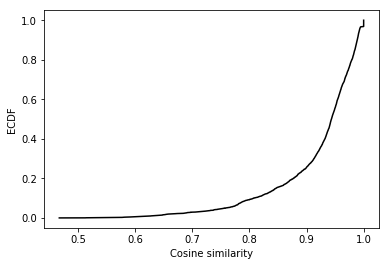

In [20]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    #print(dirs)
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',', header=0)
        #client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        data = data.append(client_data,ignore_index=True)
        #print(client_data.tail())
    data = data.set_index(pd.DatetimeIndex(data['time']))
    data = data.resample('2Min').mean()
    plt.plot(getECDF(data), color='black')
    plt.xlabel('Cosine similarity')
    plt.ylabel('ECDF')
    plt.show()
    #return data

read_clients("similarity_new")
#print(data)

## Cosine similarity of collaborative algorithm

In [10]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity', 'available', 'all']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    print(dirs)
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',', header=None)
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        data = data.append(client_data,ignore_index=True)        
    data = data.set_index(pd.DatetimeIndex(data['time']))
    data = data.resample('2Min').mean()
    #data.dropna(data['similarity'])
    return data

#plt.plot(getECDF(data), color='black')
#plt.xlabel('Cosine similarity')
#plt.ylabel('ECDF')
#plt.show()
#return data

similarity10 =read_clients("cosine/20")
similarity10.to_csv('similarity20.csv')
#print(similarity10)

['gw17.csv', 'gw16.csv', 'gw15.csv', 'gw12.csv', 'gw18.csv', 'gw11.csv', 'gw13.csv', 'gw14.csv', 'gw1.csv', 'gw10.csv', 'gw7.csv', 'gw19.csv', 'gw6.csv', 'gw23.csv', 'gw8.csv', 'gw3.csv', 'gw2.csv', 'gw20.csv', 'gw22.csv']


## Vivaldi cosine similarity

In [47]:
import os
from math import *
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['round', 'seconds', 'expected', 'real','error']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = []
    a = None
    b = None
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    print(dirs)
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',', header=None)
        #print(c)
        if a is None:
            a = client_data.as_matrix()
            
        else:
            b = client_data.as_matrix()
    i=0
    while(i<len(a)):
       #print(a[i],':',b[i])
        print(cosine_similarity(a[i],b[i]))
        i+=1
    return data

def square_rooted(x): 
    return round(sqrt(sum([a*a for a in x])),3)

def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

#plt.plot(getECDF(data), color='black')
#plt.xlabel('Cosine similarity')
#plt.ylabel('ECDF')
#plt.show()
#return data

similarity10 =read_clients("vivaldi/5")
#similarity10.to_csv('vivaldi5.csv')
#print(similarity10)

['expected.csv', 'vivaldi.csv']
0.975
0.994
0.994
0.997
0.998
0.999
0.999
0.897
0.849
0.939
0.964
0.959
0.992
0.98
0.979
0.985
0.983
0.982
0.977
0.986
0.991
0.991
0.992
0.978
0.987
0.975
0.98
0.968
0.965
0.969
0.969
0.973
0.971
0.986
0.968
0.968
0.966
0.976
0.993
0.992
0.999
0.987
0.982
0.987
0.985
0.993
0.996
0.995
0.99
0.985
0.985
0.997
0.998
0.976
0.979
0.978
0.99
0.977
0.981
0.98
0.962
0.989
0.995
0.996
0.998
0.994
0.994
0.994
0.993
0.995
0.99
0.994
0.97
0.944
0.947
0.957
0.962
0.975
0.981
0.987
0.991
0.995
0.972
0.975
0.973
0.974
0.993
0.99
0.997
0.996
0.992
0.992
0.993
0.972
0.971
0.965
0.961
0.956
0.953
0.996


['sim10.csv', 'sim5.csv', 'sim15.csv']
sim10.csv


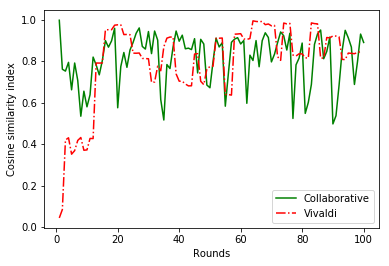

sim5.csv


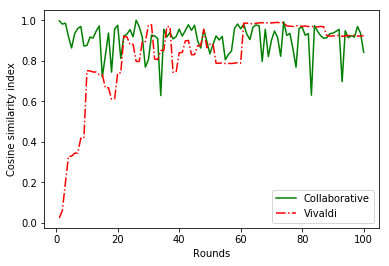

sim15.csv


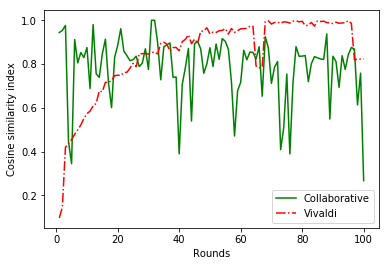

In [75]:
import os
from math import *
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['round', 'seconds', 'expected', 'real','error']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = []
    a = None
    b = None
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    print(dirs)
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',', header=0)
        print(client)
        client_data = client_data.set_index(client_data['Round'])
        client_data.plot(x='Round', color=['green','red'], style=['-','-.'])
        plt.xlabel('Rounds')
        plt.ylabel('Cosine similarity index')
        plt.show()

read_clients("collab_sim")
#similarity10.to_csv('vivaldi5.csv')
#print(similarity10)